# Projet IA - ETHIQUE FASHION
## *De la fast fashion à la mode éthique*

**Porteuse de valeurs intimement liées à notre épanouissement personnel, l’industrie de la mode est pourtant de
plus en plus critiquée pour ses pratiques environnementales plus que problématiques.**


Dégradation des fibres synthétiques en microparticules, surutilisation de l’eau et des pesticides dans la culture du coton, accumulation folle de déchets impossibles à recycler, conditions de travail proche de l’esclavage dans les pays émergents, pollution colossale liée au transport des marchandises produites loin de leurs marchés de destination : l’industrie de la mode est depuis plusieurs années sous le feu des plus vives critiques de la part des acteurs de l’action humanitaire
et de l’économie sociale et solidaire.


Oxfam, le WWF, Greenpeace et bien d’autres dénoncent, à longueur d’enquêtes et de rapports, tous plus édifiants les uns que les autres, la tragédie sociale et environnementale qui se joue en toile de fond d’un marché dont l’accélération et la globalisation ont été véritablement spectaculaires en quelques décennies. Des pratiques à questionner


Dans un monde où il semble naturel de posséder des vêtements par dizaines, de produire de nouvelles collections tous les 15 jours, de commander sur un coup de tête un pantalon, un tee-shirt, une paire de chaussures à des prix dérisoires, de partager sur les réseaux sociaux son outfit of the day, dans ce monde obsédé par l’image individuelle, il peut paraître incongru de
remettre en cause les valeurs de la mode, traditionnellement associées à l’intégration sociale, à l’épanouissement personnel, au fun.


**Pourtant, les conséquences de ce marché tel qu’il fonctionne aujourd’hui relèvent bien de
l’urgence absolue.**


Partant de ce constat, comment ne pas se poser la question de ce que tous les acteurs peuvent y faire ? Designers, producteurs, distributeurs, logisticiens, politiciens, communicants, et bien sûr consommateurs : les échelles de décision et d’action sont nombreuses, ce qui suppose une multiplicité des démarches de réflexion et de sensibilisation possibles. Des solutions à rechercher


À travers l’étude et la compréhension de tous les impacts sociaux, environnementaux ou énergétiques, l’exploitation des données économiques, mais aussi l'observation des comportements d’achats, de conservation, de revente, de recyclage, de mise au rebut, il est crucial de formuler des pistes de réflexion nouvelles dans l’espoir d’améliorer une situation aussi critique.

# Préambule : 

## *Installation des librairies* 

**Pour la manipulation de tableau :**

In [73]:
import pandas as pd
import numpy as np
import itertools

**Pour la création de graphiques :**

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns

**Pour l'exploration de données :**

In [75]:
import phik
from phik import report
from phik.report import plot_correlation_matrix
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import friedmanchisquare
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from statsmodels.sandbox.stats.multicomp import MultiComparison

**Pour le machine learning :**

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor

**Pour le deep learning :**

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.layers import LSTM
from keras import backend as K

## *Lecture des données*

## Préambule du Notebook Python sur Jupyter

C'est dans le cadre d'une prise de conscience environnementale que notre entreprise, spécialisée dans le routage du textile, se penche sur le challenge de réduction de sa pollution quotidienne. Répondant à une décision stratégique prise lors du dernier comité de direction, nous nous engageons à rendre nos processus plus écologiques.

Comme partie intégrante de cette transformation, nous avons décidé de tirer profit des compétences en ingénierie et en data science pour optimiser le contrôle de notre production. Notre infrastructure de production est composée de plusieurs lignes de routage, dont chacune comprend une variété de machines qui traitent quotidiennement des centaines de milliers de vêtements. Malheureusement, une proportion significative de ces vêtements est perdue en raison d'erreurs mécaniques au niveau de nos lignes de routage.

Nous avons l'ambition d'utiliser la data science pour prédire les pannes de machines sur nos lignes de routage et estimer précisément notre vitesse de production. Pour ce faire, nous avons équipé toutes les machines d'une de nos lignes de production de capteurs connectés. Ces dispositifs permettent de recueillir diverses données potentiellement utiles pour l'élaboration de modèles statistiques de prédiction.

### Dictionnaire des données :

* **time:**
  - Echelle temporelle en minute au format : *yyyy-mm-dd HH:MM:SS*


* **nb_new_erreur_double_margeur :** Indicateur d'erreur du type *'double margeur'*, signalant si le dispositif a placé deux encarts publicitaires au lieu d'un seul sur un vêtement.
  - **Détection de panne :** 1 pour présence d'une panne, 0 sinon.
  - **Mise à jour :** chaque minute.


* **nb_new_erreur_manque_margeur :** Indicateur d'erreur du type *'manque margeur'*, signalant si le dispositif n'a placé aucun encart publicitaire alors qu'il aurait dû en placer un.
  - **Détection de panne :** 1 pour présence d'une panne, 0 sinon.
  - **Mise à jour :** chaque minute.


* **nb_new_erreur_stacker :** Indicateur d'erreur du type *'stacker'*, signalant si la machine a mal empaqueté le vêtement.
  - **Détection de panne :** 1 pour présence d'une panne, 0 sinon.
  - **Mise à jour :** chaque minute.


* **nb_new_erreur_encre :** Indicateur d'erreur du type *'encre'*, signalant si l'adresse sur l'étiquette du carton n'est pas visible ou s'il y a eu un jet d'encre.
  - **Détection de panne :** 1 pour présence d'une panne, 0 sinon.
  - **Mise à jour :** chaque minute.


* **nb_new_erreur_sitma :** Indicateur global d'erreur sur les machines margeur, stacker et encre. Une erreur sitma entraîne l'arrêt de la ligne de routage.
  - **Détection de panne :** 1 pour présence d'une panne, 0 sinon.
  - **Mise à jour :** chaque minute.


* **nb_new_products :** Compteur de production de vêtements.
  - **Type de donnée :** numérique continue.
  - **Mise à jour :** chaque minute.


* **nb_new_attente_sitma :** Indicateur d'arrêt manuel de la ligne de routage, probablement dû à une erreur liée aux ficeleuses, au shur ou à l'agv.
  - **Détection d'arrêt :** 1 pour arrêt, 0 sinon.
  - **Mise à jour :** chaque minute.


* **nb_new_erreur_ficeleuse :** Indicateur d'erreur du type *'ficeleuse pro'* ou *'ficeleuse ino'*, signalant si le carton n'a pas été correctement fermé.
  - **Détection de panne :** 1 pour présence d'une panne, 0 sinon.
  - **Mise à jour :** chaque minute.


* **nb_new_erreur_shur :** Indicateur d'erreur du type *'shur'*, signalant si toutes les cagettes à disposition sont pleines.
  - **Détection de panne :** 1 pour présence d'une panne, 0 sinon.
  - **Mise à jour :** chaque minute.


* **nb_new_erreur_agv :** Indicateur d'erreur du type *'agv'*, signalant si tous les robots de transport de cagettes sont occupés et que la ligne de production doit s'arrêter, faute de place pour le remplissage de nouvelles cagettes.
  - **Détection de panne :** 1 pour présence d'une panne, 0 sinon.
  - **Mise à jour :** chaque minute.

In [78]:
df = pd.read_excel("tab_brut_ia.xlsx")
df

,time,nb_new_products,nb_new_erreur_stacker,nb_new_erreur_sitma,nb_new_erreur_encre,nb_new_attente_sitma,nb_new_erreur_double_margeur_2,nb_new_erreur_double_margeur_3,nb_new_erreur_manque_margeur_2,nb_new_erreur_manque_margeur_3,...,nb_new_erreur_double_margeur_7,nb_new_erreur_double_margeur_8,nb_new_erreur_double_margeur_9,nb_new_erreur_manque_margeur_7,nb_new_erreur_manque_margeur_8,nb_new_erreur_manque_margeur_9,nb_new_erreur_ficeleuse_pro,nb_new_erreur_ficeleuse_ino,nb_new_erreur_shur,nb_new_erreur_agv
0,2022-01-10 05:38:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-01-10 05:39:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
2,2022-01-10 05:40:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-2,0,0,0
3,2022-01-10 05:41:00,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,0,0
4,2022-01-10 05:42:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71593,2022-05-13 16:25:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71594,2022-05-13 16:26:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71595,2022-05-13 16:27:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71596,2022-05-13 16:28:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
print("Format du tableau df : ", df.shape)
print(df.info())
df.describe()

Format du tableau df :  (71598, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71598 entries, 0 to 71597
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   time                            71598 non-null  object
 1   nb_new_products                 71598 non-null  int64 
 2   nb_new_erreur_stacker           71598 non-null  int64 
 3   nb_new_erreur_sitma             71598 non-null  int64 
 4   nb_new_erreur_encre             71598 non-null  int64 
 5   nb_new_attente_sitma            71598 non-null  int64 
 6   nb_new_erreur_double_margeur_2  71598 non-null  int64 
 7   nb_new_erreur_double_margeur_3  71598 non-null  int64 
 8   nb_new_erreur_manque_margeur_2  71598 non-null  int64 
 9   nb_new_erreur_manque_margeur_3  71598 non-null  int64 
 10  nb_new_erreur_double_margeur_4  71598 non-null  int64 
 11  nb_new_erreur_double_margeur_5  71598 non-null  int64 
 12  nb_new_err

,nb_new_products,nb_new_erreur_stacker,nb_new_erreur_sitma,nb_new_erreur_encre,nb_new_attente_sitma,nb_new_erreur_double_margeur_2,nb_new_erreur_double_margeur_3,nb_new_erreur_manque_margeur_2,nb_new_erreur_manque_margeur_3,nb_new_erreur_double_margeur_4,...,nb_new_erreur_double_margeur_7,nb_new_erreur_double_margeur_8,nb_new_erreur_double_margeur_9,nb_new_erreur_manque_margeur_7,nb_new_erreur_manque_margeur_8,nb_new_erreur_manque_margeur_9,nb_new_erreur_ficeleuse_pro,nb_new_erreur_ficeleuse_ino,nb_new_erreur_shur,nb_new_erreur_agv
count,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,...,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.00000
mean,50.695522,0.010363,0.098802,0.059625,0.015489,0.000796,0.002123,0.000112,0.000223,0.000894,...,0.000210,0.000559,0.000223,0.000210,0.000559,0.000223,0.008534,0.016020,0.002235,0.00169
std,1207.413655,0.660070,4.289203,2.465547,0.621776,0.032356,0.227932,0.010570,0.031711,0.198460,...,0.022732,0.036230,0.024789,0.022732,0.036230,0.024789,0.679150,1.129459,1.006589,0.69572
min,-224152.000000,-39.000000,-291.000000,-160.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-2.000000,-1.000000,0.000000,-2.000000,-1.000000,-101.000000,-162.000000,-214.000000,-143.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,97354.000000,155.000000,867.000000,488.000000,83.000000,3.000000,59.000000,1.000000,7.000000,53.000000,...,4.000000,6.000000,5.000000,4.000000,6.000000,5.000000,101.000000,185.000000,102.000000,62.00000


Les dimensions de notre table de données *df* se composent de 72k lignes et 26 colonnes. 24 de nos variables sont de type *int64* et une seule est de type *object*. Il n'y a visuellement pas de valeurs manquantes (*on compte le même nombre de données dans toutes nos variables*) mais nous pouvons observer quelques anomalies comme les valeurs négatives identifiée dans le minimum de la variable *'nb_new_products'* ; étant un compteur de production il est impossible que le boitier connecté renvoie une valeur inférieure à 0. 

Nous commencerons donc ce notebook en nettoyant les données. Dans un premier temps nous nous occuperons des variables qualitatives binaires, puis de la variable de temps et enfin du compteur de production qui est une valeur quantitative continue.

# 1. Data Quality 
# 1.1. Variables qualitatives 

Les variables suivantes sont des sorties d'informations binaires de boîtiers connectés à des machines présentes sur la ligne de production de vêtement :
* nb_new_stacker
* nb_new_erreur_sitma
* nb_new_attente_sitma
* nb_new_erreur_manque_margeur_ *
* nb_new_erreur_double_margeur_ *
* nb_new_ficeleuse_pro
* nb_new_ficeleuse_ino
* nb_new_erreur_shur
* nb_new_erreur_agv


Cependant, il arrive que l'information sortie du boîtiée soit endommagée. Pour s'assurer de la qualité des données nous devons travailler deux points : 
* **Valeurs négatives :** Modifier en '0' toutes les valeurs strictement inférieures à 0
* **Valeurs positives :** Modifier en '1' toutes les valeurs strictement supérieures à 1 

In [80]:
df1 = df.copy()

for col in df1.columns[2:]:
    df1[col] = df1[col].apply(lambda x: 1 if x >= 1 else 0)

df1.describe()

,nb_new_products,nb_new_erreur_stacker,nb_new_erreur_sitma,nb_new_erreur_encre,nb_new_attente_sitma,nb_new_erreur_double_margeur_2,nb_new_erreur_double_margeur_3,nb_new_erreur_manque_margeur_2,nb_new_erreur_manque_margeur_3,nb_new_erreur_double_margeur_4,...,nb_new_erreur_double_margeur_7,nb_new_erreur_double_margeur_8,nb_new_erreur_double_margeur_9,nb_new_erreur_manque_margeur_7,nb_new_erreur_manque_margeur_8,nb_new_erreur_manque_margeur_9,nb_new_erreur_ficeleuse_pro,nb_new_erreur_ficeleuse_ino,nb_new_erreur_shur,nb_new_erreur_agv
count,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,...,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000
mean,50.695522,0.010084,0.112056,0.072223,0.020336,0.000698,0.000964,0.000112,0.000084,0.000168,...,0.000112,0.000433,0.000154,0.000112,0.000433,0.000154,0.009525,0.013799,0.012067,0.009833
std,1207.413655,0.099913,0.315438,0.258858,0.141147,0.026417,0.031029,0.010570,0.009154,0.012945,...,0.010570,0.020804,0.012394,0.010570,0.020804,0.012394,0.097133,0.116658,0.109188,0.098672
min,-224152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97354.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1.2. Variable quantitative continue

Les valeurs tirées de *nb_new_products* sont différentes de celles observées dans les variables précédentes. Non-binaire, cette variable représente le nombre de vêtement produit dans un intervale de 1mn. 

En ce sens, il est anormal de trouver des valeurs négatives. On ne peut pas produire négativement. Nous décidons donc de modifier en '0' toutes les valeurs strictement inférieures à 0 pour la variable *nb_new_products*. 

In [81]:
df2 = df1.copy()

df2["nb_new_products"] = df2["nb_new_products"].apply(lambda x: 0 if x < 0 else x)

df2.describe()

,nb_new_products,nb_new_erreur_stacker,nb_new_erreur_sitma,nb_new_erreur_encre,nb_new_attente_sitma,nb_new_erreur_double_margeur_2,nb_new_erreur_double_margeur_3,nb_new_erreur_manque_margeur_2,nb_new_erreur_manque_margeur_3,nb_new_erreur_double_margeur_4,...,nb_new_erreur_double_margeur_7,nb_new_erreur_double_margeur_8,nb_new_erreur_double_margeur_9,nb_new_erreur_manque_margeur_7,nb_new_erreur_manque_margeur_8,nb_new_erreur_manque_margeur_9,nb_new_erreur_ficeleuse_pro,nb_new_erreur_ficeleuse_ino,nb_new_erreur_shur,nb_new_erreur_agv
count,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,...,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000
mean,56.682170,0.010084,0.112056,0.072223,0.020336,0.000698,0.000964,0.000112,0.000084,0.000168,...,0.000112,0.000433,0.000154,0.000112,0.000433,0.000154,0.009525,0.013799,0.012067,0.009833
std,509.498857,0.099913,0.315438,0.258858,0.141147,0.026417,0.031029,0.010570,0.009154,0.012945,...,0.010570,0.020804,0.012394,0.010570,0.020804,0.012394,0.097133,0.116658,0.109188,0.098672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97354.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


De plus, nous remarquons également que 25% de nos données sont supérieures à 120 avec notamment un pic à 97 354. En une minute, une ligne de production est incapable de produire autant de vêtements. Chaque ligne peut produir jusqu'à 10 000 vêtements par heure, aussi tout relevé de compteur supérieur à 166 serait aberrant (car `10000/60 = 166`). 

Nous décidons de remplacer les valeurs aberrantes par la moyenne des valeurs *nb_new_products* sur une fenêtre mobile de 10 minutes. 

In [82]:
df3 = df2.copy()

df3["nb_new_products"] = df3["nb_new_products"].apply(lambda x: x if x <= 166 else df3["nb_new_products"].rolling(window=10).mean().values[-1])
df3["nb_new_products"] = df3["nb_new_products"].astype(float)

df3.describe()

,nb_new_products,nb_new_erreur_stacker,nb_new_erreur_sitma,nb_new_erreur_encre,nb_new_attente_sitma,nb_new_erreur_double_margeur_2,nb_new_erreur_double_margeur_3,nb_new_erreur_manque_margeur_2,nb_new_erreur_manque_margeur_3,nb_new_erreur_double_margeur_4,...,nb_new_erreur_double_margeur_7,nb_new_erreur_double_margeur_8,nb_new_erreur_double_margeur_9,nb_new_erreur_manque_margeur_7,nb_new_erreur_manque_margeur_8,nb_new_erreur_manque_margeur_9,nb_new_erreur_ficeleuse_pro,nb_new_erreur_ficeleuse_ino,nb_new_erreur_shur,nb_new_erreur_agv
count,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,...,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000,71598.000000
mean,53.566105,0.010084,0.112056,0.072223,0.020336,0.000698,0.000964,0.000112,0.000084,0.000168,...,0.000112,0.000433,0.000154,0.000112,0.000433,0.000154,0.009525,0.013799,0.012067,0.009833
std,58.602038,0.099913,0.315438,0.258858,0.141147,0.026417,0.031029,0.010570,0.009154,0.012945,...,0.010570,0.020804,0.012394,0.010570,0.020804,0.012394,0.097133,0.116658,0.109188,0.098672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,166.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1.3. Variable temporelle

Les données issues de la variables *time* sont des dates au format yyy-mm-dd hh:mm:ss. Chaque ligne correspond à une minute pendant laquelle tous les boîtiers connectées envoie l'information d'une panne ou du nombre de vêtement produit pour le cas de la variable *nb_new_products*. 

Pour des traitements ultérieurs, il sera utile que python considère cette variable comme une date. 

In [83]:
df4= df3.copy()

df4["time"] = pd.to_datetime(df4["time"])

df4["time"].dtypes

dtype('<M8[ns]')

De plus, l'entreprise travaillant 24h/24 du lundi au vendredi, les lignes de production sont à l'arrêt tous les weekend de l'année. Avec cette information, il est important de faire en sorte que notre échelle temporelle corresponde au temps d'activité de l'entreprise. Enfin, d'un point de vue métier, il est plus intéressant pour un opérationnel d'avoir une prévision à l'heure plutôt qu'à la minute où l'intervale de temps sera trop court pour réaliser n'importe quelle opération de maintenance. 

Aussi, nous allons commencer par rééchantilloner notre variable de temps pour que chaque observation corresponde à une heure et plus à une minute. Puis nous supprimerons de notre échelle tous les jours correspondant à un samedi ou à un dimanche.

In [84]:
df4.index = df4["time"]

df4 = df4.resample('H').sum()
df4 = df4[df4.index.weekday < 5]  # [0-4] correspond à du lundi au vendredi

df4.describe()

,nb_new_products,nb_new_erreur_stacker,nb_new_erreur_sitma,nb_new_erreur_encre,nb_new_attente_sitma,nb_new_erreur_double_margeur_2,nb_new_erreur_double_margeur_3,nb_new_erreur_manque_margeur_2,nb_new_erreur_manque_margeur_3,nb_new_erreur_double_margeur_4,...,nb_new_erreur_double_margeur_7,nb_new_erreur_double_margeur_8,nb_new_erreur_double_margeur_9,nb_new_erreur_manque_margeur_7,nb_new_erreur_manque_margeur_8,nb_new_erreur_manque_margeur_9,nb_new_erreur_ficeleuse_pro,nb_new_erreur_ficeleuse_ino,nb_new_erreur_shur,nb_new_erreur_agv
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,...,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,1624.585661,0.304935,3.376164,2.182030,0.628957,0.016760,0.027467,0.003724,0.002328,0.004655,...,0.003724,0.012104,0.003259,0.003724,0.012104,0.003259,0.280261,0.399441,0.370577,0.304935
std,2309.877932,1.026720,5.131710,3.541742,1.459479,0.187396,0.225711,0.060928,0.057052,0.074616,...,0.096444,0.177554,0.077745,0.096444,0.177554,0.077745,0.971241,1.364136,1.102781,0.900051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3721.500000,0.000000,6.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8194.000000,17.000000,30.000000,27.000000,15.000000,4.000000,5.000000,1.000000,2.000000,2.000000,...,4.000000,5.000000,3.000000,4.000000,5.000000,3.000000,20.000000,20.000000,14.000000,13.000000


**En rééchantillonnant notre dataset par minute, toutes nos variables initialement qualitative binaire (*i.e.* '0' pour 'pas de panne' et '1' pour 'panne') ont été transformées en variables quantitatives continues.** 

## 1.4. Valeurs manquantes 

Même si nous avons vu précédemment qu'il ne semblait pas y avoir de données manquantes dans notre dataset, il est tout de même important de confirmer cette hypothèse. 

In [85]:
na_sum = df4.isna().sum().sum()
print("Le dataset se compose de", na_sum, "données manquantes.")

Le dataset se compose de 0 données manquantes.


Le fait qu'il n'y ait aucune donnée manquante n'est pas anormal dans la mesure où les données proviennent de boîtiers connectés. Tant que ces derniers sont en état de marche ils enverront des données à la fréquence où ils ont été programmé.

# 2. Featuring

# 2.1. Les margeurs

Chaque ligne de production comporte 9 margeurs. Tous ne sont pas utilisé lors de la production et ces derniers peuvent être échangé au cours du temps. 

Aussi, nous décidons de regrouper les erreurs *double* et *manque* de tous les margeurs en deux colonnes :
* nb_new_erreur_double_margeur
* nb_new_erreur_manque_margeur

In [86]:
cols_double_margeur = df4.filter(regex='nb_new_erreur_double_margeur_\d+').columns
cols_manque_margeur = df4.filter(regex='nb_new_erreur_manque_margeur_\d+').columns

df4['nb_new_erreur_double_margeur'] = df4[cols_double_margeur].sum(axis=1)
df4['nb_new_erreur_manque_margeur'] = df4[cols_manque_margeur].sum(axis=1)

df4 = df4.drop(columns=cols_double_margeur)
df4 = df4.drop(columns=cols_manque_margeur)

df4.describe()

,nb_new_products,nb_new_erreur_stacker,nb_new_erreur_sitma,nb_new_erreur_encre,nb_new_attente_sitma,nb_new_erreur_ficeleuse_pro,nb_new_erreur_ficeleuse_ino,nb_new_erreur_shur,nb_new_erreur_agv,nb_new_erreur_double_margeur,nb_new_erreur_manque_margeur
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,1624.585661,0.304935,3.376164,2.182030,0.628957,0.280261,0.399441,0.370577,0.304935,0.069832,2.006518
std,2309.877932,1.026720,5.131710,3.541742,1.459479,0.971241,1.364136,1.102781,0.900051,0.390577,8.490602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3721.500000,0.000000,6.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8194.000000,17.000000,30.000000,27.000000,15.000000,20.000000,20.000000,14.000000,13.000000,5.000000,93.000000


## 2.2. Arrêt de la ligne de production liée à une panne

Les variables *nb_new_erreur_sitma* et *nb_new_attente_sitma* marque l'arrêt de la ligne de production lorsqu'un périmètre spécifiques de machines est touché. En sommant ces deux informations dans *nb_arret_panne* nous obtenons une nouvelle variable permettant la qualification d'un arrêt provoqué par une panne mécanique.

In [87]:
df4["nb_arret_panne"] = df4["nb_new_erreur_sitma"] + df4["nb_new_attente_sitma"]

df4 = df4.drop(["nb_new_erreur_sitma", "nb_new_attente_sitma"], axis = 1)

df4.describe()

,nb_new_products,nb_new_erreur_stacker,nb_new_erreur_encre,nb_new_erreur_ficeleuse_pro,nb_new_erreur_ficeleuse_ino,nb_new_erreur_shur,nb_new_erreur_agv,nb_new_erreur_double_margeur,nb_new_erreur_manque_margeur,nb_arret_panne
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,1624.585661,0.304935,2.182030,0.280261,0.399441,0.370577,0.304935,0.069832,2.006518,4.005121
std,2309.877932,1.026720,3.541742,0.971241,1.364136,1.102781,0.900051,0.390577,8.490602,6.067964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3721.500000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,8194.000000,17.000000,27.000000,20.000000,20.000000,14.000000,13.000000,5.000000,93.000000,42.000000


## 2.3. Indice temporel

Que ce soit les jours de la semaine, les semaines dans l'année ou les mois, toutes ces indications pourraient éventuellement permettre à nos différents algorithmes de mieux comprendre le fonctionnement des variations observées sur le compteur de production et sur l'occurence de panne mécanique. 

Aussi, nous allons ajouter à nos variables trois nouveaux indices à partir de la colonne *time* :
* Numéro du jour dans la semaine
* Numéro de la semaine dans l'année
* Numéro du mois dans l'année

In [88]:
df4["Jour"] = df4.index.weekday
df4["Semaine"] = df4.index.isocalendar().week
df4["Mois"] = df4.index.month

temps = ["Jour", "Semaine", "Mois"]
df4[temps]

,Jour,Semaine,Mois
time,,,
2022-01-10 05:00:00,0,2,1
2022-01-10 06:00:00,0,2,1
2022-01-10 07:00:00,0,2,1
2022-01-10 08:00:00,0,2,1
2022-01-10 09:00:00,0,2,1
...,...,...,...
2022-05-13 12:00:00,4,19,5
2022-05-13 13:00:00,4,19,5
2022-05-13 14:00:00,4,19,5


## 2.4. Export du dataframe nettoyé

In [89]:
df4.to_excel("table_IA_clean.xlsx")

# 3. Exploration des données

In [90]:
df5 = pd.read_excel("table_IA_clean.xlsx")
df5.describe()

,nb_new_products,nb_new_erreur_stacker,nb_new_erreur_encre,nb_new_erreur_ficeleuse_pro,nb_new_erreur_ficeleuse_ino,nb_new_erreur_shur,nb_new_erreur_agv,nb_new_erreur_double_margeur,nb_new_erreur_manque_margeur,nb_arret_panne,Jour,Semaine,Mois
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,1624.585661,0.304935,2.182030,0.280261,0.399441,0.370577,0.304935,0.069832,2.006518,4.005121,1.998138,10.492086,2.875233
std,2309.877932,1.026720,3.541742,0.971241,1.364136,1.102781,0.900051,0.390577,8.490602,6.067964,1.410585,5.164859,1.258148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000,3.000000
75%,3721.500000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,15.000000,4.000000
max,8194.000000,17.000000,27.000000,20.000000,20.000000,14.000000,13.000000,5.000000,93.000000,42.000000,4.000000,19.000000,5.000000


Après la réalisation du rééchantillonage des données par heure, toutes les variables de notre table de données (hormi 'time', 'Jour', 'Semaine', 'Mois' qui sont au format datetime) sont devenus des compteurs ; de production pour *nb_new_products*, d'arrêt mécanique pour *nb_arret_panne* et d'erreur machine pour toutes les autres. De fait, avant de commencer toute exploration de données, il est important d'analyser leur distribution.

Nous procéderons donc à l''étude spécifique de ces variables quantitatives et uniquement positives de notre dataset. Cela comprend les variables : 
* **Compteur de production :**
  * nb_new_products
* **Compteur de panne machine :**
  * nb_arret_panne
* **Compteur d'erreur mécanique :**
  * nb_new_erreur_margeur_manque
  * nb_new_erreur_margeur_double
  * nb_new_erreur_encre
  * nb_new_erreur_stacker
  * nb_new_erreur_ficeleuse_ino
  * nb_new_erreur_ficeleuse_pro
  * nb_new_erreur_shur
  * nb_new_erreur_agv

In [91]:
col_compteurs = df5.columns.drop(['Jour', 'Semaine', 'Mois', 'time'])

compteurs = df5[col_compteurs]

## 3.1. Analyse de la distribution 

In [92]:
def plot_histograms(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            plt.figure(figsize=(10, 5))
            plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

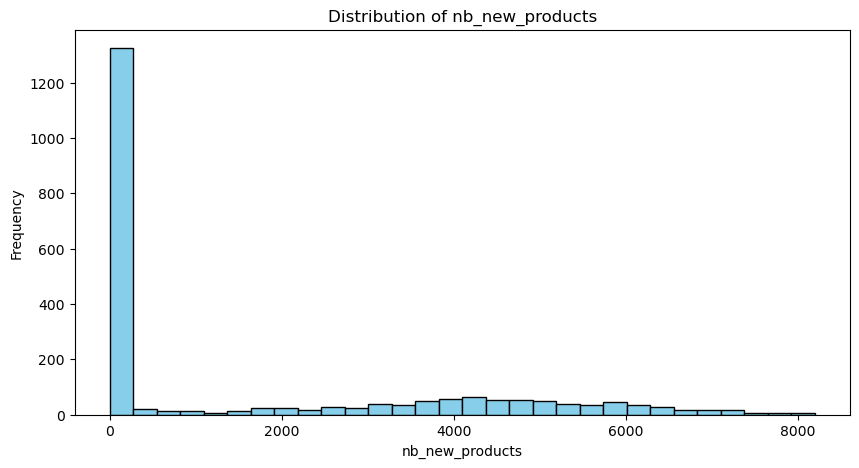

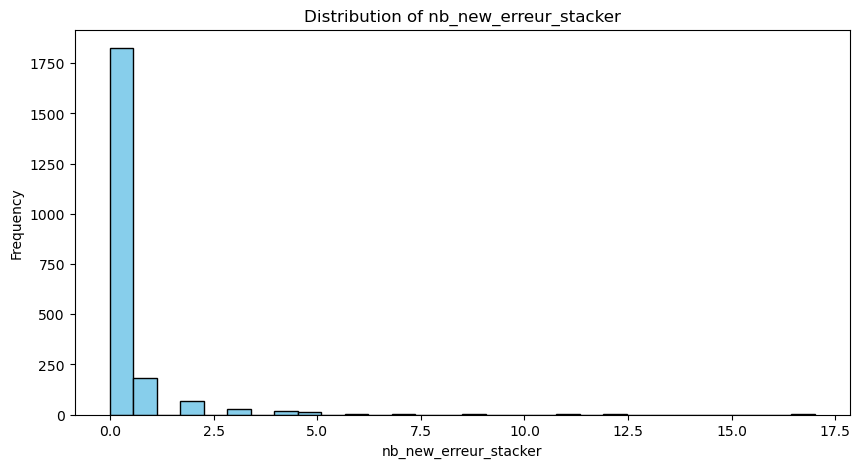

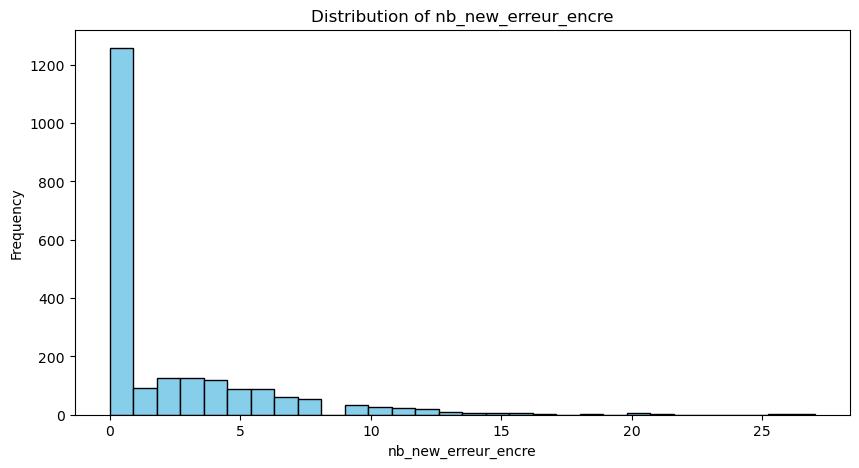

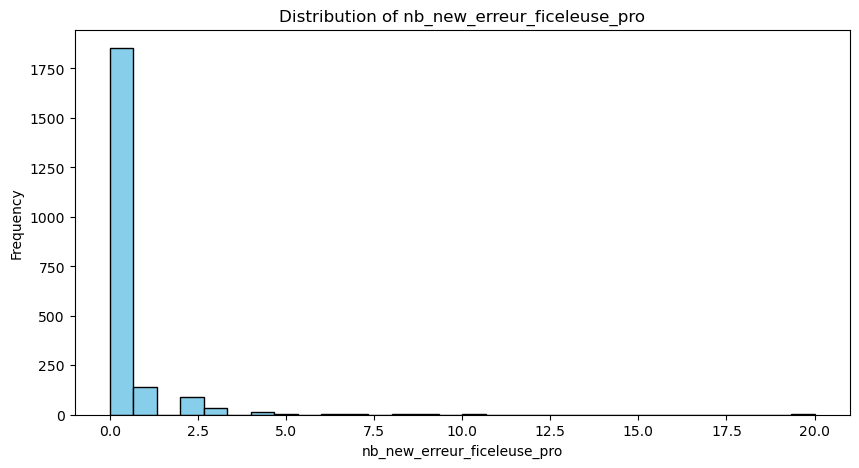

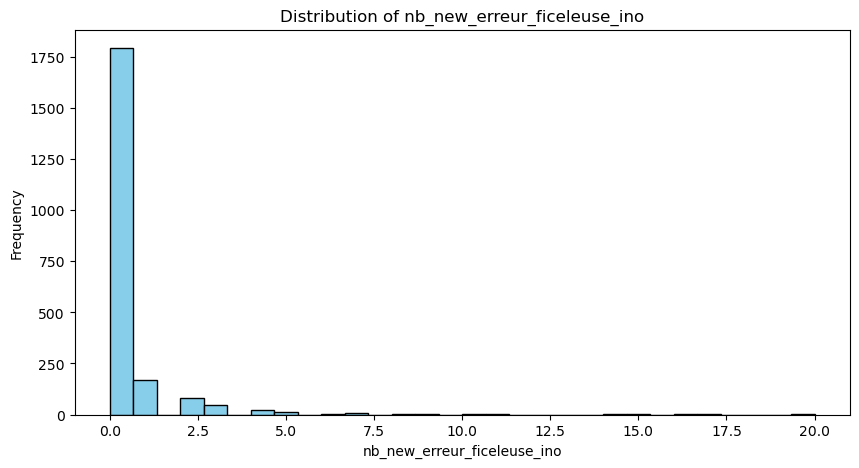

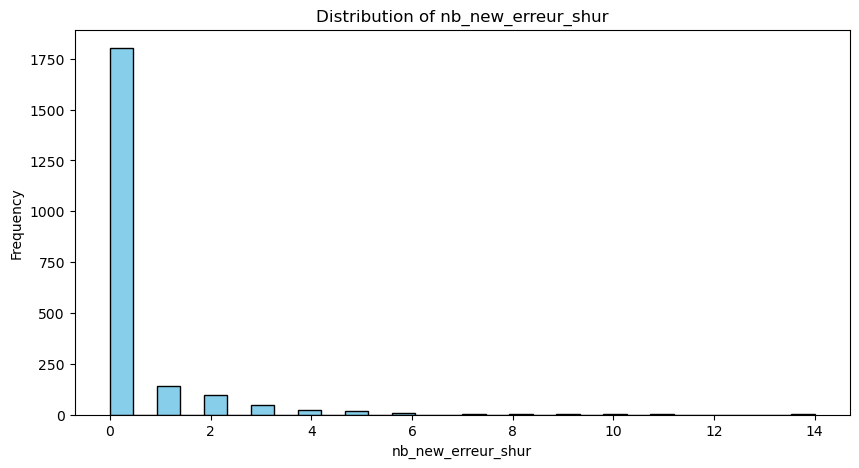

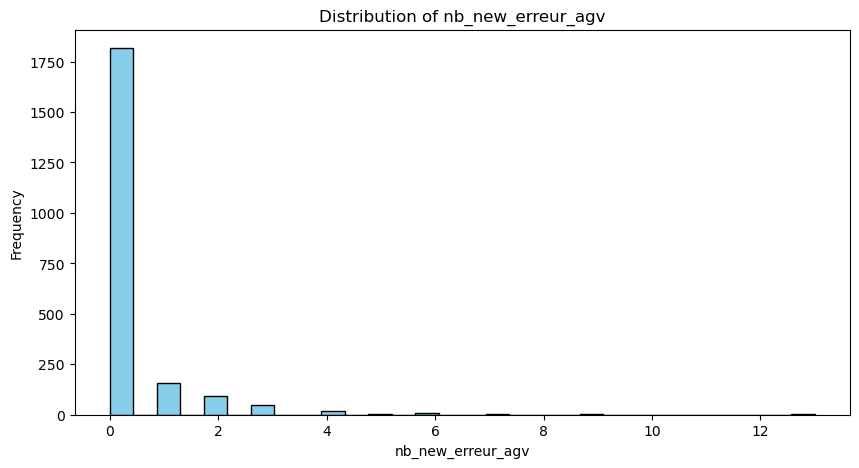

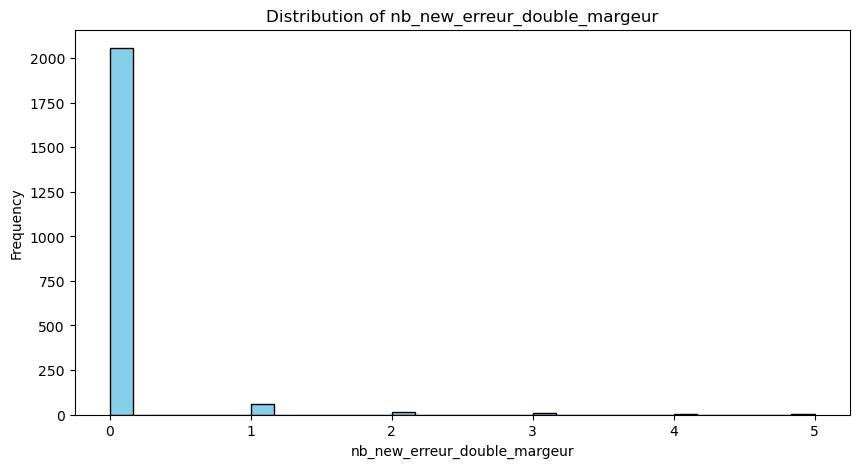

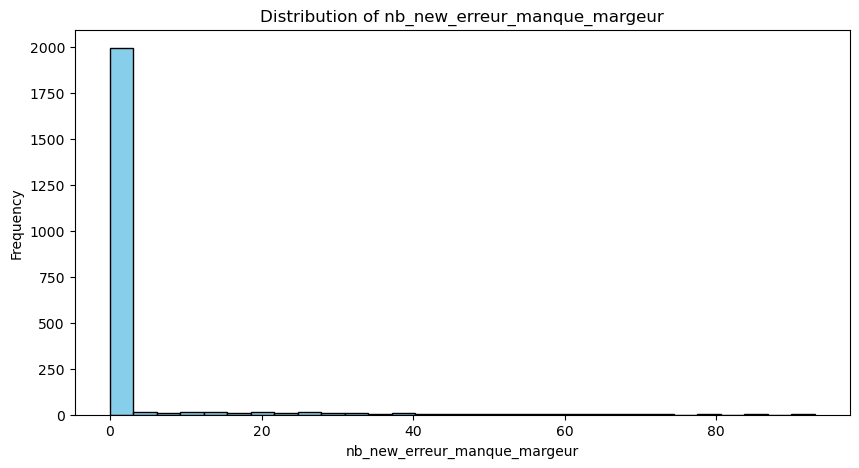

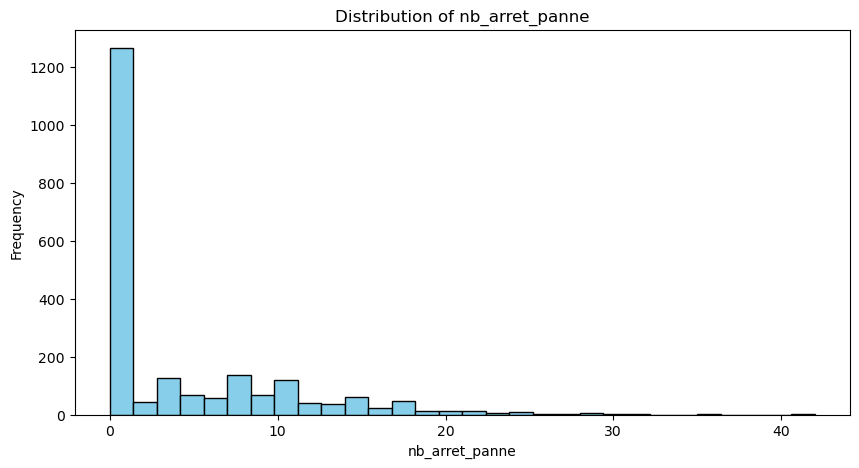

In [93]:
plot_histograms(compteurs)

### 3.2. Matrice de Corrélation

Maintenant que nous avons compris comment était distribué nos variables, nous allons examiner de plus près les relations qu'elles entretiennent entre elle en utilisant une matrice de corrélation. C'est un outil précieux pour comprendre les relations entre les différentes variables d'un ensemble de données. Elle peut aider à identifier les variables qui sont susceptibles d'avoir une influence sur les autres, ce qui peut être utile pour comprendre le comportement global de l'ensemble de données.

Dans notre cas, nous allons utiliser une matrice de corrélation de Spearman. La corrélation de Spearman est une mesure de la relation monotone entre deux variables, et contrairement à la corrélation de Pearson, elle n'a pas besoin de s'appuyer sur une relation linéaire ou sur une distribution normale. Étant donné la présence d'asymétries dans nos données, comme nous l'avons noté dans la section précédente, la corrélation de Spearman est plus appropriée pour notre analyse.

Le code suivant calcule la matrice de corrélation de Spearman pour notre ensemble de données, et crée ensuite une heatmap pour visualiser cette matrice. Les valeurs proches de 1 indiquent une forte corrélation positive, les valeurs proches de -1 indiquent une forte corrélation négative, et les valeurs proches de 0 indiquent une faible ou aucune corrélation.

In [94]:
corr_compteur = compteurs.corr(method= "spearman")

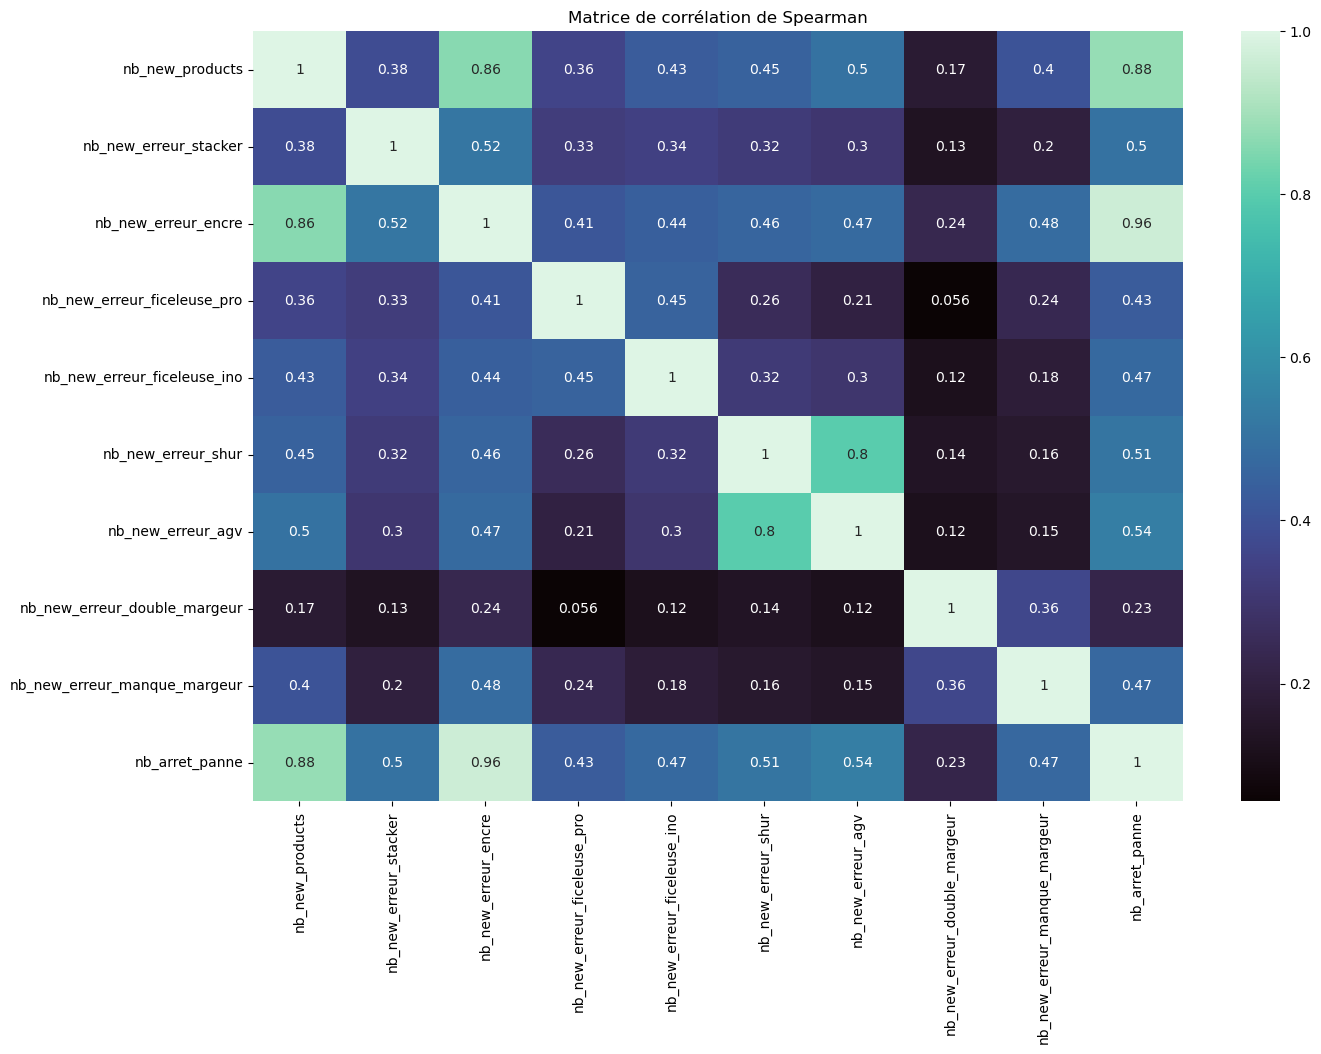

In [95]:
plt.figure(figsize=(15,10))

sns.heatmap(corr_compteur, annot= True, cmap= "mako")

plt.title("Matrice de corrélation de Spearman")

plt.show()

D'après la matrice de corrélation de Spearman ci-dessus, nous pouvons faire plusieurs observations intéressantes:

* **nb_new_products** a une corrélation très élevée avec **nb_new_erreur_encre** (0.86) et **nb_arret_panne** (0.88). Cela signifie que lorsque le nombre de nouveaux produits augmente, le nombre d'erreurs d'encre et le nombre d'arrêts de panne ont tendance à augmenter également.

* **nb_arret_panne** est également très fortement corrélé avec **nb_new_erreur_encre** (0.96), ce qui indique que ces deux variables ont tendance à augmenter et diminuer ensemble. C'est une découverte importante qui peut aider à comprendre les causes des pannes.

* **nb_new_erreur_shur** et **nb_new_erreur_agv** ont également une corrélation assez élevée (0.80), ce qui signifie qu'elles ont tendance à augmenter et diminuer ensemble.

* **Semaine** et **Mois** ont une très forte corrélation (0.975), ce qui est logique car ils sont tous deux des mesures de temps. 

Ces observations peuvent aider à diriger l'analyse future. Par exemple, nous pourrions vouloir enquêter davantage sur la relation entre **nb_new_products**, **nb_new_erreur_encre** et **nb_arret_panne**, car ces variables semblent être fortement interdépendantes.

### 3.3. Test de Friedman : *comparaison des distributions*

Pour comprendre la relation entre les variables compteurs et identifier les types de pannes qui sont le plus fortement associés à la production de nouveaux produits, nous allons effectuer un test de Friedman. Cela nous permettra de vérifier si toutes les variables ont, ou non, la même distribution. 

In [96]:
F, p_val = friedmanchisquare(*compteurs.values.T)

print('F=%.3f, p-value=%.3f' % (F, p_val))
if p_val > 0.05:
    print("Aucune variable n'a une distribution différente")
else:
    print("Au moins une variable a une distribution différente")

F=5358.165, p-value=0.000
Au moins une variable a une distribution différente


### 3.4. Test post-hoc : *la multicomparaison de moyenne de Tukey*

Le test de Friedman est un test non-paramétrique qui compare les distributions de trois variables ou plus (*i.e.* ce qui convient à la nature de nos données comme observé dans la section 3.1.1). Dans notre cas, le test a donné un F de Friedman de 5358.165 et une p-value inférieure à 0.05, ce qui signifie que nous pouvons rejeter l'hypothèse nulle selon laquelle toutes les variables ont la même distribution. En d'autres termes, il existe au moins une variable dont la distribution est significativement différente de celle des autres.

Pour identifier quelles sont les paires ayant une distribution différentes lorsque le test de Friedman est négatif, il est possible d'utiliser le test de Tukey. Fréquemment utilisé en statistiques en étude post-hoc, il permet de trouver les moyennes significativement différentes les unes des autres. 

Cette méthode s'élabore en plusieurs étapes : 
* **Mise-à-jour du format :** dataframe 2D en dataframe 1D
* **Réalisation du test de Tukey :** stockage des données dans *result*
* **Mise à jour du format :** table Tukey HSD en dataframe panda

In [106]:
compteurs_reshape = np.concatenate(compteurs.values)
group = np.repeat(compteurs.columns, len(compteurs))

In [107]:
mc = MultiComparison(compteurs_reshape, group)
result = mc.tukeyhsd()

In [108]:
result_df = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])

### 3.4.1. Comparaisons avec nb_new_products

In [71]:
comparaison_nb_products = result_df[result_df["group1"].str.contains('nb_new_products') | 
                                    result_df["group2"].str.contains('nb_new_products')]

comparaison_nb_products = comparaison_nb_products.sort_values(by="p-adj", ascending=True)

In [26]:
print("{:<30s} {:<30s} {:<10s} {:<10s} {:<15s} {:<15s} {:<10s}".format(
    "Groupe 1", "Groupe 2", "Diff moy", "p-value", "IC-", "IC+", "Rejet"
))
for index, row in comparaison_nb_products.iterrows():
    print("{:<30s} {:<30s} {:<10.4f} {:<10.4f} {:<15.4f} {:<15.4f} {:<10}".format(
        row['group1'], row['group2'], row['meandiff'], row['p-adj'], row['lower'], row['upper'], str(row['reject'])
    ))

Groupe 1                       Groupe 2                       Diff moy   p-value    IC-             IC+             Rejet     
nb_new_erreur_encre            nb_new_products                130.6750   0.0000     46.1693         215.1808        True      
nb_new_erreur_ficeleuse_ino    nb_new_products                161.9818   0.0000     77.4761         246.4876        True      
nb_arret_panne                 nb_new_products                90.4795    0.0246     5.9738          174.9853        True      
nb_new_erreur_agv              nb_new_products                89.6736    0.0272     5.1679          174.1794        True      
nb_new_erreur_shur             nb_new_products                -45.2858   0.7984     -129.7916       39.2199         False     
nb_new_erreur_manque_margeur   nb_new_products                -33.6047   0.9626     -118.1105       50.9010         False     
nb_new_erreur_stacker          nb_new_products                27.1345    0.9914     -57.3712        111.6403   

Nous avons effectué des comparaisons multiples en utilisant le test post-hoc de Tukey pour identifier précisément quels types de compteurs sont les plus fortement associés à la production de nouveaux produits. Nous relevons plusieurs points :


* **'nb_arret_panne' :** 
  * Différence statistiquement significative entre cet indicateur et le nombre de nouveaux vêtements produits sur la ligne de routage (*i.e.* nb_new_products)
  * Le nombre d'arrêts mécanique a un effet significatif sur la variance observée de la production de nouveaux produits


* **'nb_new_erreur_agv', 'nb_new_erreur_encre', 'nb_new_erreur_ficeleuse_ino' :** 
  * Différence significative pour ces trois indicateurs de panne avec le nombre de nouveaux vêtements produits sur la ligne de routage (*i.e.* nb_new_products)
  * Les variables peuvent avoir un effet significatif sur la variance observée de la production de nouveaux produits


* **'nb_new_erreur_double_margeur', 'nb_new_erreur_ficeleuse_pro', 'nb_new_erreur_manque_margeur', 'nb_new_erreur_shur', 'nb_new_erreur_stacker' :** 
  * Pas de différence significative pour ces indicateurs 
  * Les variables n'ont pas d'effet significatif sur la variance observée de la production de nouveaux produits


Nos analyses statistiques suggèrent que certains types de compteurs, tels que celui des arrêts de panne, des erreurs AGV, des erreurs d'encre et des erreurs de ficeleuse ino, sont significativement associés à la production de nouveaux produits. On retrouve dans ces résultats ceux observés lors de la matrice de corrélation qui avait déjà mis en avant les erreurs d'encre et les arrêts de pannes. 

### 3.4.2. Comparaisons avec nb_arret_panne

In [110]:
comparaison_arret_panne = result_df[result_df["group1"].str.contains('nb_arret_panne') | 
                                    result_df["group2"].str.contains('nb_arret_panne')]

comparaison_arret_panne = comparaison_arret_panne.sort_values(by="p-adj", ascending=True)

In [111]:
print("{:<30s} {:<30s} {:<10s} {:<10s} {:<15s} {:<15s} {:<10s}".format(
    "Groupe 1", "Groupe 2", "Diff moy", "p-value", "IC-", "IC+", "Rejet"
))
for index, row in comparaison_arret_panne.iterrows():
    print("{:<30s} {:<30s} {:<10.4f} {:<10.4f} {:<15.4f} {:<15.4f} {:<10}".format(
        row['group1'], row['group2'], row['meandiff'], row['p-adj'], row['lower'], row['upper'], str(row['reject'])
    ))

Groupe 1                       Groupe 2                       Diff moy   p-value    IC-             IC+             Rejet     
nb_arret_panne                 nb_new_erreur_shur             135.7654   0.0000     51.2596         220.2711        True      
nb_arret_panne                 nb_new_erreur_manque_margeur   124.0843   0.0001     39.5785         208.5900        True      
nb_arret_panne                 nb_new_erreur_ficeleuse_pro    110.6499   0.0014     26.1442         195.1556        True      
nb_arret_panne                 nb_new_products                90.4795    0.0246     5.9738          174.9853        True      
nb_arret_panne                 nb_new_erreur_double_margeur   88.7076    0.0306     4.2019          173.2134        True      
nb_arret_panne                 nb_new_erreur_ficeleuse_ino    -71.5023   0.1829     -156.0081       13.0034         False     
nb_arret_panne                 nb_new_erreur_stacker          63.3450    0.3430     -21.1608        147.8507   

Nous relevons également ici plusieurs points :

* **'nb_new_erreur_shur', 'nb_new_erreur_manque_margeur', 'nb_new_erreur_ficeleuse_pro', 'nb_new_erreur_double_margeur' :**
  * Différence statistiquement significative entre ces indicateurs de pannes et le nombre d'arrêt mécanique de la ligne de routage (*i.e.* nb_arret_panne)
  * Les pannes identifiées ont un effet significatif sur la variance observée des arrêts mécaniques
  
  
* **'nb_new_products' :**
  * Différence statistiquement significative entre cet indicateur et le nombre d'arrêt mécanique de la ligne de routage (*i.e.* nb_arret_panne)
  * La production de nouveau produit a un effet significatif sur la variance observée des arrêts mécaniques
  
  
* **'nb_new_erreur_ficeleuse_ino', 'nb_new_erreur_stacker', 'nb_new_erreur_encre', 'nb_new_erreur_agv' :**
  * Pas de différence significative pour ces indicateurs
  * Les pannes identifiées n'ont pas d'effet singificatif sur la variance observée des arrêts mécaniques

Nos analyses statistiques suggèrent que certains types de compteurs comme ceux des erreurs Shur, Manque margeur, Ficeleuse ino, etc., sont significativement associés aux arrêts mécaniques de la ligne de routage. On retrouve dans ces résultats ceux déjà identifiés dans la matrice de corrélation.  

Terminons notre exploration en mesurant l'importance des variables ayant une comparaison significative au test de Tukey. 

## 3.4. Mesure de l'Importance des Variables Significatives

Une fois les comparaisons aux variances significativements dépendantes identifiées, il est possible de mesurer l'importance de ces caractéristiques dans la prédiction des nos modèles liés :
* **Aux arrêts mécaniques :** `nb_arret_panne ~ nb_new_erreur_shur * nb_new_erreur_manque_margeur * nb_new_erreur_ficeleuse_pro * nb_new_erreur_double_margeur * nb_new_products` 


* **A la production :** `nb_new_products ~ nb_arret_panne * nb_new_erreur_encre * nb_new_erreur_agv * nb_new_erreur_ficeleuse`. 

Pour cela, nous entraînerons nos modèles avec *RandomForestRegressor* qui est une variante de l'algorithme *RandomForest* utilisée pour des modèles de régressions, donc nécessitant l'utilisation de données continues (ce que nous observons dans nos données actuelles). Comme tous les modèles *RandomForest*, le *RandomForestRegressor* est un alorigthme d'ensemble ; c'est-à-dire qu'il est le résultat de la combinaison de la multitude de prédictions générées par les *DecisionTree* composant le modèle. 

Un *DecisionTree* fonctionne comme un flux de décisions où chacune conduit à un ensemble de résultats ou de décisions supplémentaires. Chaque noeud représente les caractéristiques du jeu de données entraîné, chaque branche illustre les décisions prises et chaque feuille met en avant un résultat, une prévision. Si le fonctionnement est simple, il est important de faire attention à la profondeur (*i.e.* le nombre de couches de noeuds atribués) attribuée au *DecisionTree* car les problèmes de surajustement des données d'entraînement sont récurent.  

**Exemple de *DecisionTree* :**
![DecisionTree](DecisionTree.jpg)

Chaque *DecisionTree* d'une *RandomForest* se compose d'un échantillon de données collecté à partir d'un échantillonnage par bootstrap. Par ailleurs, plutôt que de chercher à identifier la caractéristique la plus utile à la division d'un noeud, la *RandomForest* recherche la meilleure caractéristique parmi un sous-ensemble aléatoire de caractéristiques. En combinant l'échantillonnage par bootstrap et la sélection aléatoire de caractéristiques, cela permet d'enrichir la diversité de prédictions et d'obtenir ainsi de meilleur résultat. 

**Exemple de *RandomForest* :**
![RandomForest](RandomForest.png)

La prédiction d'un *RandomForestRegressor* est issue de la moyenne de toutes celles réalisées par les *DecisionTree* le composant. Ce processus tend à réduire la variance générées par la diversité des prédictions des *DecisionTree* et ainsi à rendre le modèle moins sensibles aux variations spécifiques des données d'entraînement et moins sujet au surajustement de la prédiction aux données. Enfin, *RandomForestRegressor* permet la mesure de l'importance de chaque caractéristique dans la prédiction du modèle. 

Nous utiliserons donc un *RandomForestRegressor* sur nos deux modèles de prédiction (nb_arret_panne et nb_new_products). Pour les raisons évoquées plus haut mais également car ce modèle a a l'avantage de pouvoir gérer des relations non linéaires et ne requiert pas que nos données suivent une distribution particulière.

### 3.4.1. Prédiction horaire de la production de vêtements  

Le résultat de ce code sera la liste des variables significatives avec leur importance relative dans la prédiction de *'nb_new_products'*. Ces valeurs nous aideront à comprendre l'impact de chaque variable sur notre modèle.

In [126]:
features_product = ['nb_arret_panne', 
                   'nb_new_erreur_agv', 
                   'nb_new_erreur_encre', 
                   'nb_new_erreur_ficeleuse_ino']

X_product = compteurs[features_product]
y_product = compteurs['nb_new_products']

model_product = RandomForestRegressor(n_estimators=100, random_state=42)
model_product.fit(X_product, y_product)

importance_product = model_product.feature_importances_

for feature_product, importance_product in zip(features_product, importance_product):
    print(f"Variable: {feature_product} | Importance: {importance_product}")

Variable: nb_arret_panne | Importance: 0.8479855682374442
Variable: nb_new_erreur_agv | Importance: 0.020983349731956046
Variable: nb_new_erreur_encre | Importance: 0.0838596418299309
Variable: nb_new_erreur_ficeleuse_ino | Importance: 0.047171440200668824


* **nb_arret_panne** : Cette variable est la plus importante dans la prédiction de 'nb_new_products', avec une importance de 0.848 (ou 84.8%). Cela signifie qu'une augmentation du nombre d'arrêts dus aux pannes aurait probablement un impact négatif majeur sur la production de vêtements.

* **nb_new_erreur_agv** : Cette variable a une importance de 0.021 (ou 2.1%), ce qui est relativement faible. Cela signifie que le nombre d'erreurs AGV a une influence limitée sur le nombre de produits finis mais elle ne doit pas être négligée, car une augmentation des erreurs AGV pourrait avoir un impact négatif sur la production.

* **nb_new_erreur_encre** : Cette variable a une importance de 0.084 (ou 8.4%). Les erreurs d'encre ont une influence modérée sur le nombre de produits finis. Une réduction des erreurs d'encre pourrait entraîner une augmentation de la production de vêtements.

* **nb_new_erreur_ficeleuse_ino** : Cette variable a une importance de 0.047 (ou 4.7%), ce qui est également une influence non négligeable. Les erreurs de ficeleuse ino ont un impact modéré sur la production. En réduisant ce type d'erreur, on pourrait s'attendre à une augmentation de la production de vêtements.

En résumé, ces résultats suggèrent que pour maximiser la production de vêtements, les efforts devraient principalement se concentrer sur la réduction des arrêts de machine dus à des pannes. Cependant, les erreurs d'encre et de ficeleuse ino, bien que moins influentes, ne doivent pas être négligées. Enfin, l'impact des erreurs AGV, bien que faible, pourrait s'avérer significatif dans certaines circonstances.

### 3.4.2. Prédiction horaire des arrêts mécaniques 

Le résultat de ce code sera la liste des variables significatives avec leur importance relative dans la prédiction de *'nb_arret_panne'*. Ces valeurs nous aideront à comprendre l'impact de chaque variable sur notre modèle.

In [128]:
features_meca = ['nb_new_erreur_shur',
                 'nb_new_erreur_manque_margeur',
                 'nb_new_erreur_ficeleuse_pro',
                 'nb_new_erreur_double_margeur',
                 'nb_new_products']

X_meca = compteurs[features_meca]
y_meca = compteurs['nb_arret_panne']

model_meca = RandomForestRegressor(n_estimators=100, random_state=42)
model_meca.fit(X_meca, y_meca)

importance_meca = model_meca.feature_importances_

for feature_meca, importance_meca in zip(features_meca, importance_meca):
    print(f"Variable: {feature_meca} | Importance: {importance_meca}")

Variable: nb_new_erreur_shur | Importance: 0.05252234062352737
Variable: nb_new_erreur_manque_margeur | Importance: 0.05030897135638674
Variable: nb_new_erreur_ficeleuse_pro | Importance: 0.049738127838807156
Variable: nb_new_erreur_double_margeur | Importance: 0.010296091204472948
Variable: nb_new_products | Importance: 0.8371344689768059


* **nb_new_products :** Cette variable est la plus importante dans la prédiction de 'nb_arret_panne', avec une importance de 0.837 (ou 83.7%). Cela signifie qu'une augmentation du nombre de vêtement produit pourrait probablement avoir un impact majeur sur le nombre d'arrêt mécanique de la ligne de routage. 

* **nb_new_erreur_manque_margeur, nb_new_erreur_ficeleuse_ino :** Ces deux variables ont une importance relative de 0.050 (ou 5.0%) et 0.049 (ou 4.9%) respectivement dans la prédiction de 'nb_arret_panne'. Les erreurs margeur de type manque et les erreurs de la ficeleuse ino ont une influence modée sur le nombre d'arrêt mécanique. Une augmentation de ces erreurs pourrait tirer les arrêts mécaniques à la hausse. 

* **nb_new_erreur_double_margeur :** Cette variable a une importance de 0.010 (ou 1.0%) dans la prédiction de 'nb_arret_panne'. Les erreurs margeur de type double ont une influence limitées sur le nombre d'arrêt mécanique mais ne doivent tout de même pas être négligées car elles ont une influence significative sur la variation de ces arrêts.

En résumé, ces résultats suggèrent que pour minimiser le nombre d'arrêt mécanique, les efforts devraient principalement se concentrer sur la réduction des erreurs mécaniques de la ligne de routage de type 'margeur manque' et 'ficeleuse ino'. De plus, l'impact des erreurs de type 'margeur double', bien que faible, pourrait s'avérer significatif dans certaines circonstances. 

# 4. Préparation des données 

Nous avons commencé par nettoyer notre jeu de données afin d'assurer la qualité et la fiabilité des informations collectées. Une fois cette action réalisée, nous avons créé de nouvelles caractéristiques à partir de celle déjà existantes et nous avons exploré nos données. De fait, nous récupérons trois informations précieuses : 
* **Dataframe d'analyse :** `df5`


* **Modèle production :** `nb_new_products ~ nb_arret_panne * nb_new_erreur_encre * nb_new_erreur_agv * nb_new_erreur_ficeleuse_ino`


* **Modèle panne :** `nb_arret_panne ~ nb_new_products * nb_new_erreur_shur * nb_new_erreur_manque_margeur * nb_new_erreur_ficeleuse_pro * nb_new_erreur_double_margeur`

La phase de préparation des données a pour objectif d'appliquer nos différentes observations sur nos jeux de données et manipuler le format de nos informations pour optimiser la performance de futurs apprentissages automatiques. Dans cette étape, nous réaliserons plusieurs activités telles que, 
* Sélection des variables prédictrices et de la variable dépendante
* Standardisation
* Découpage des données en train et test
* Saisonnalité et Tendance

In [136]:
df6 = df5.copy()
df6 = df6.set_index("time")

## 4.1. Variable d'intérêt : *nb_new_products*

### 4.1.1. Modèle 1 : *issu des résultats du Test de Friedmann*

#### 4.1.1.1. Sélection des caractéristiques pertinentes

In [137]:
variables_1 = ["nb_new_products", "nb_arret_panne", "nb_new_erreur_encre", "nb_new_erreur_agv", "nb_new_erreur_ficeleuse_ino"]
variable_1 = compteurs[variables_1]

variable_1.head(3)

,nb_new_products,nb_arret_panne,nb_new_erreur_encre,nb_new_erreur_agv,nb_new_erreur_ficeleuse_ino
0,25,6,4,0,2
1,188,9,7,2,0
2,1790,22,11,6,4


In [138]:
variable_1 = variable_1.copy()
variable_1.loc[:, "Semaine"] = df5["Semaine"]

variable_1 = variable_1.set_index(df6.index)

variable_1.head(3)

,nb_new_products,nb_arret_panne,nb_new_erreur_encre,nb_new_erreur_agv,nb_new_erreur_ficeleuse_ino,Semaine
time,,,,,,
2022-01-10 05:00:00,25,6,4,0,2,2
2022-01-10 06:00:00,188,9,7,2,0,2
2022-01-10 07:00:00,1790,22,11,6,4,2


#### 4.1.1.2. Standardisation des données

In [139]:
scaler_1 = StandardScaler()

df6_1 = pd.DataFrame(scaler_1.fit_transform(variable_1), columns= variable_1.columns, index= variable_1.index)

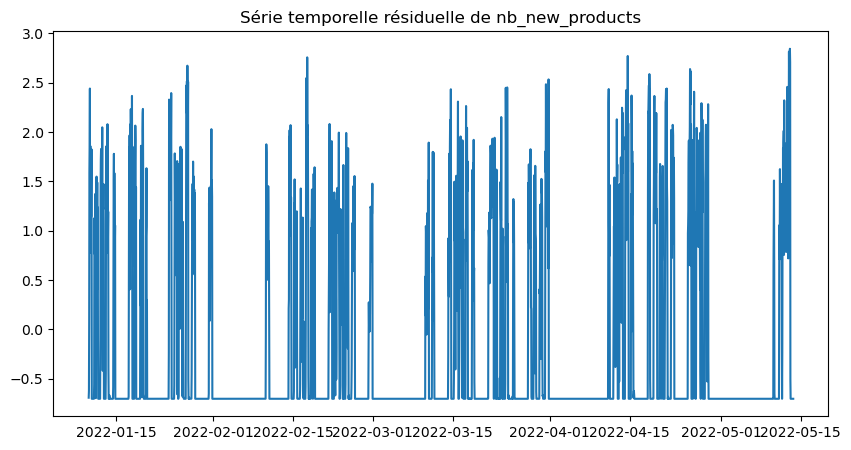

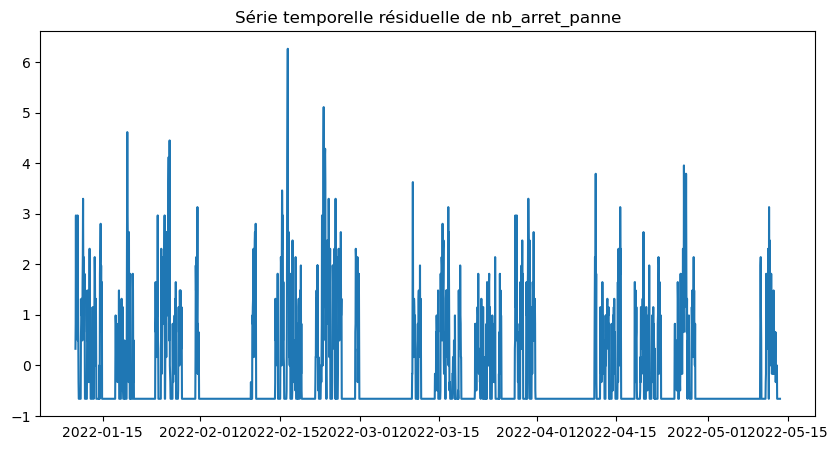

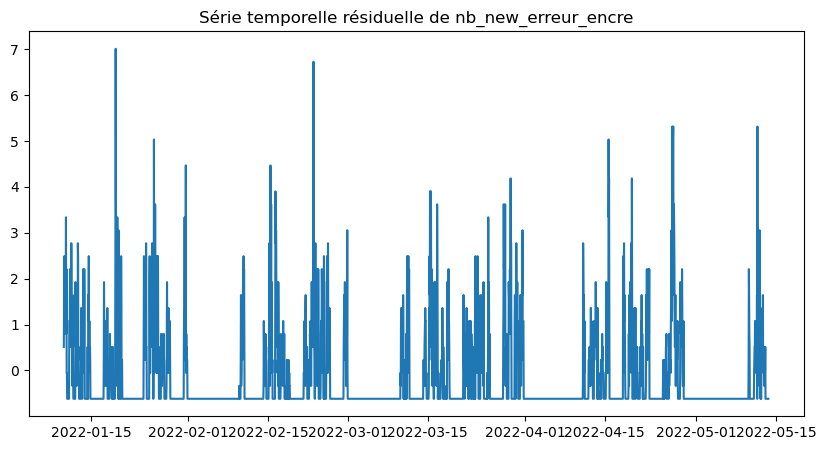

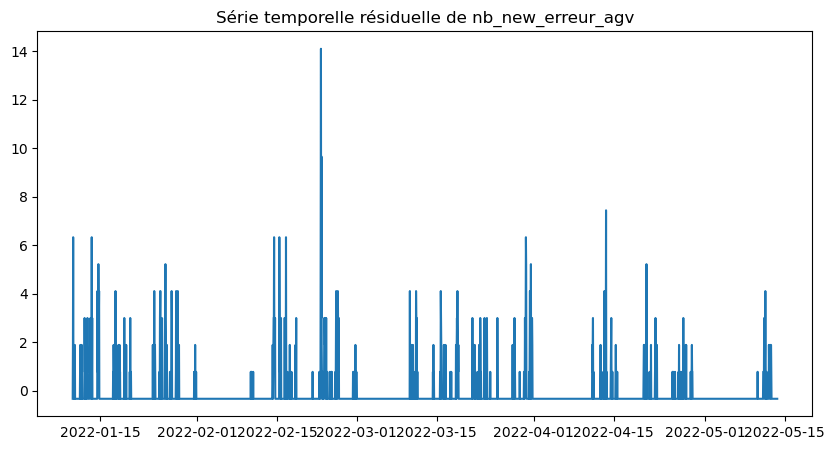

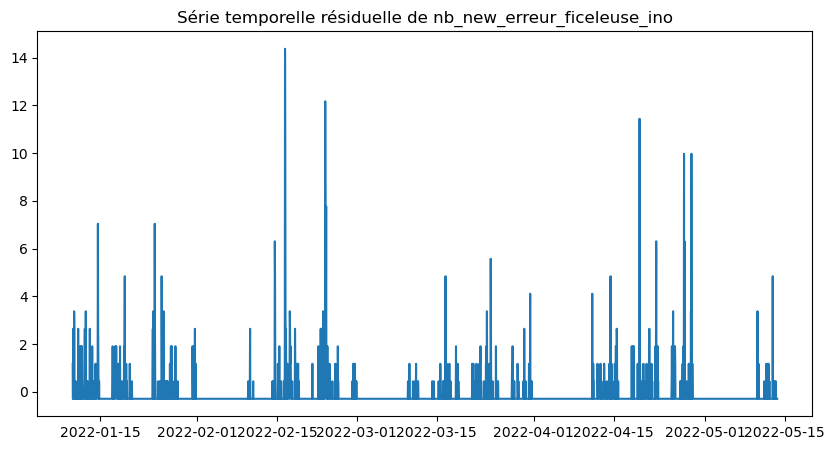

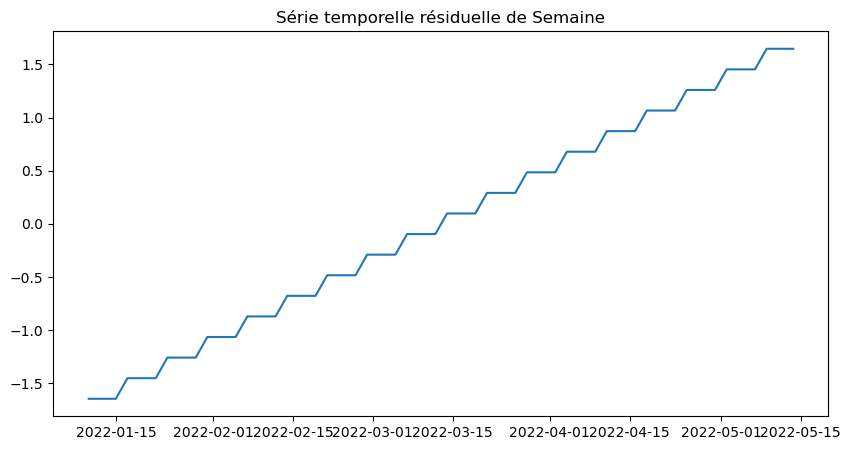

In [140]:
for var in variable_1 :
    
    plt.figure(figsize=(10, 5))
    
    plt.plot(df6_1.index, df6_1[var])
    
    plt.title(f'Série temporelle de {var}')
    
    plt.show()

#### 4.1.1.3. Suppression de la tendance et de la saisonnalité des variables

In [141]:
df6_1_resid = pd.DataFrame()

for var in variable_1 :
    stl_decomp = STL(endog= df6_1[var], period= 15*24).fit()
    df6_1_resid[var] = stl_decomp.resid

df6_1_resid.head(3)

,nb_new_products,nb_arret_panne,nb_new_erreur_encre,nb_new_erreur_agv,nb_new_erreur_ficeleuse_ino,Semaine
time,,,,,,
2022-01-10 05:00:00,-0.246148,0.094232,0.135486,-0.189381,-0.586454,-8.881784e-16
2022-01-10 06:00:00,-0.179581,-0.099109,-0.167792,0.398356,-0.425526,-3.108624e-15
2022-01-10 07:00:00,-0.770898,-0.187979,0.036834,1.828817,0.745168,0.000000e+00


### 4.1.2. Modèle 2 : *simple*

#### 4.1.2.1. Sélection des caractéristiques pertinentes

In [142]:
variables_2 = ["nb_new_products", "nb_arret_panne"]
variable_2 = compteurs[variables_2]

variable_2.head(3)

,nb_new_products,nb_arret_panne
0,25,6
1,188,9
2,1790,22


In [144]:
variable_2 = variable_2.copy()
variable_2.loc[:, "Semaine"] = df5["Semaine"]

variable_2 = variable_2.set_index(df6.index)

variable_2.head(3)

,nb_new_products,nb_arret_panne,Semaine
time,,,
2022-01-10 05:00:00,25,6,2
2022-01-10 06:00:00,188,9,2
2022-01-10 07:00:00,1790,22,2


#### 4.1.2.2. Standardisation des données

In [145]:
scaler_2 = StandardScaler()

df6_2 = pd.DataFrame(scaler_2.fit_transform(variable_2), columns= variable_2.columns, index= variable_2.index)

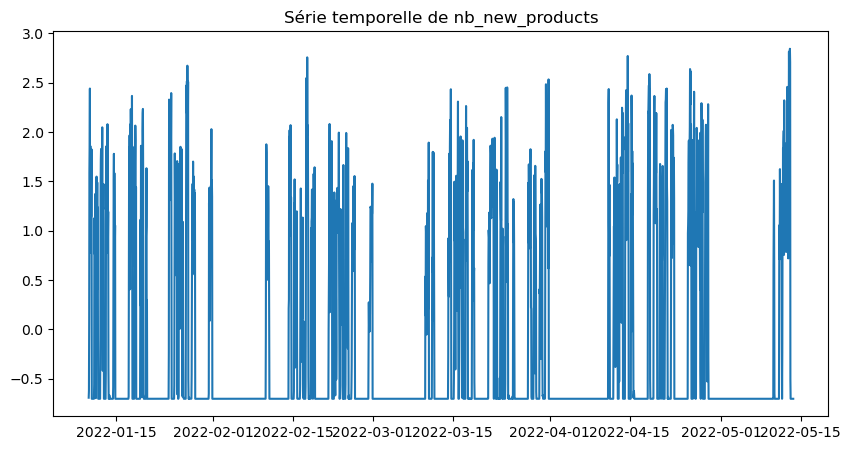

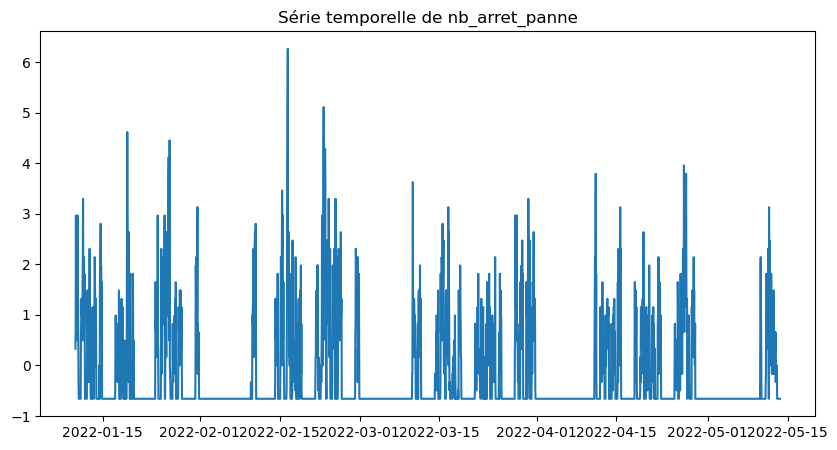

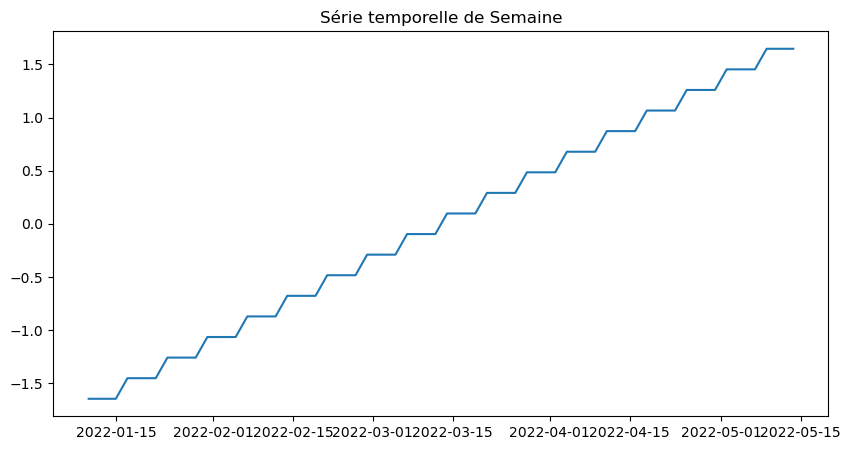

In [146]:
for var in variable_2 :
    
    plt.figure(figsize=(10, 5))
    
    plt.plot(df6_2.index, df6_2[var])
    
    plt.title(f'Série temporelle de {var}')
    
    plt.show()

#### 4.1.2.3. Suppression de la saisonnalité et de la tendance

In [148]:
df6_2_resid = pd.DataFrame()

for var in variable_2 :
    stl_decomp = STL(endog= df6_2[var], period= 15*24).fit()
    df6_2_resid[var] = stl_decomp.resid

df6_2_resid.head(3)

,nb_new_products,nb_arret_panne,Semaine
time,,,
2022-01-10 05:00:00,-0.246148,0.094232,-8.881784e-16
2022-01-10 06:00:00,-0.179581,-0.099109,-3.108624e-15
2022-01-10 07:00:00,-0.770898,-0.187979,0.000000e+00


### 4.1.3. Modèle 3 : *caractéristiques optimisées*

#### 4.1.3.1. Sélection des caractéristiques pertinentes

In [149]:
variables_3 = ["nb_new_products", "nb_arret_panne", "nb_new_erreur_encre", "nb_new_erreur_agv", "nb_new_erreur_shur", "nb_new_erreur_stacker", "nb_new_erreur_double_margeur"]
variable_3 = compteurs[variables_3]

variable_3.head(3)

,nb_new_products,nb_arret_panne,nb_new_erreur_encre,nb_new_erreur_agv,nb_new_erreur_shur,nb_new_erreur_stacker,nb_new_erreur_double_margeur
0,25,6,4,0,0,2,0
1,188,9,7,2,4,1,0
2,1790,22,11,6,10,1,0


In [150]:
variable_3 = variable_3.copy()
variable_3.loc[:, "Semaine"] = df5["Semaine"]

variable_3 = variable_3.set_index(df6.index)

variable_3.head(3)

,nb_new_products,nb_arret_panne,nb_new_erreur_encre,nb_new_erreur_agv,nb_new_erreur_shur,nb_new_erreur_stacker,nb_new_erreur_double_margeur,Semaine
time,,,,,,,,
2022-01-10 05:00:00,25,6,4,0,0,2,0,2
2022-01-10 06:00:00,188,9,7,2,4,1,0,2
2022-01-10 07:00:00,1790,22,11,6,10,1,0,2


#### 4.1.3.2. Standardisation des données

In [151]:
scaler_3 = StandardScaler()

df6_3 = pd.DataFrame(scaler_3.fit_transform(variable_3), columns= variable_3.columns, index= variable_3.index)

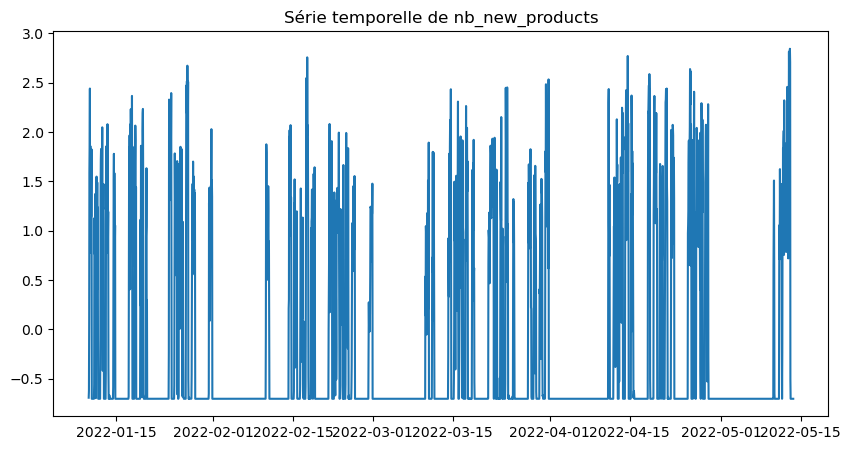

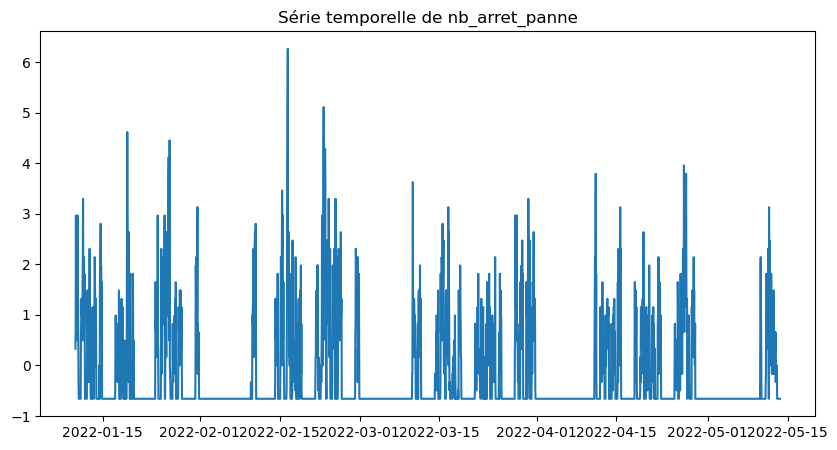

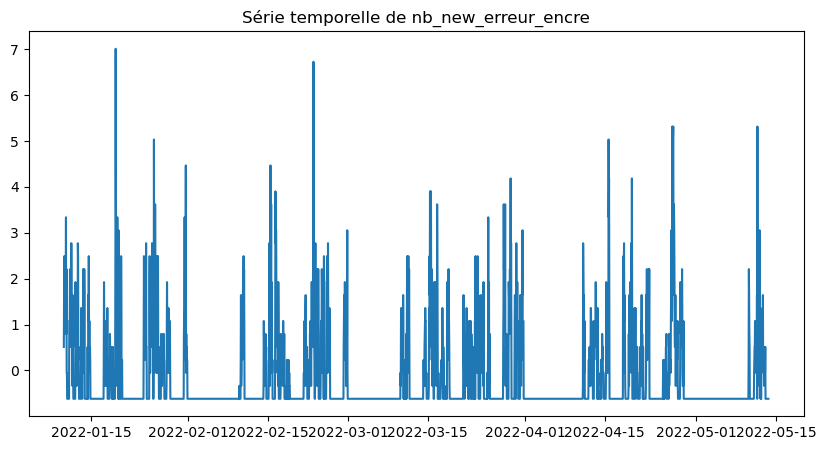

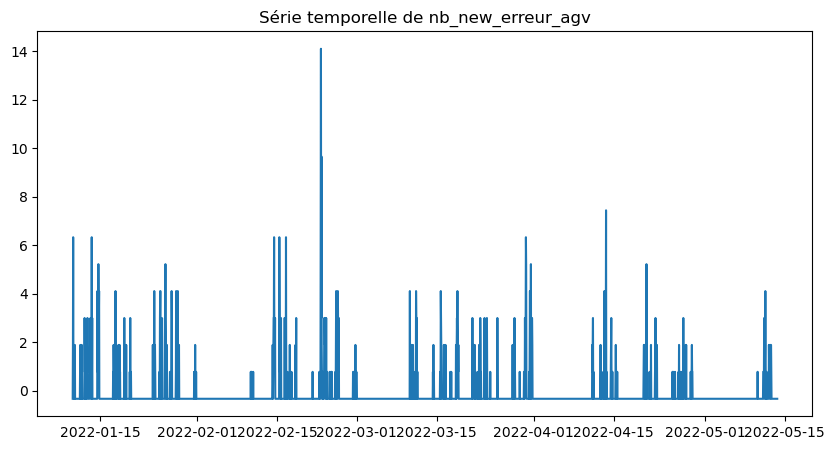

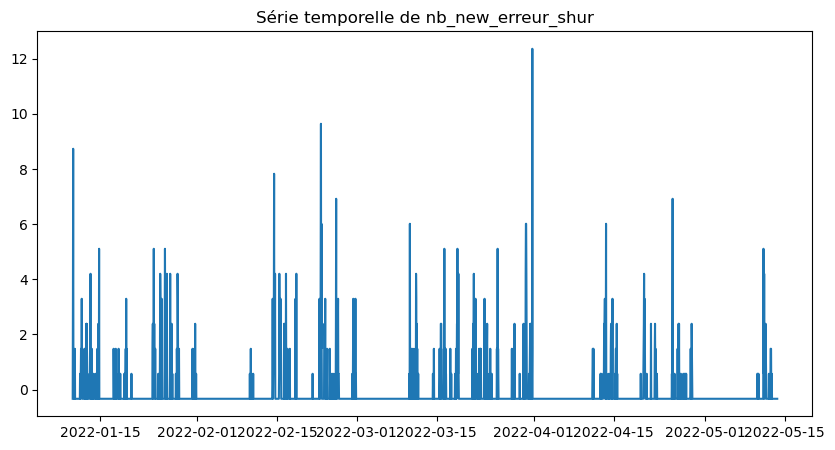

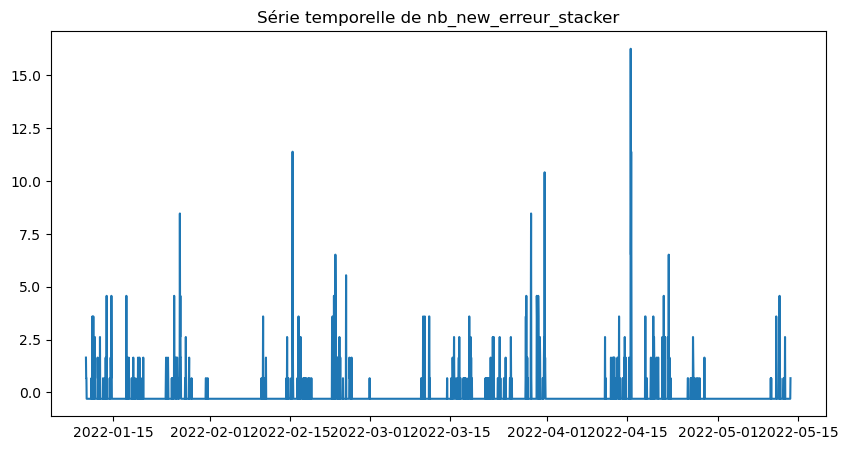

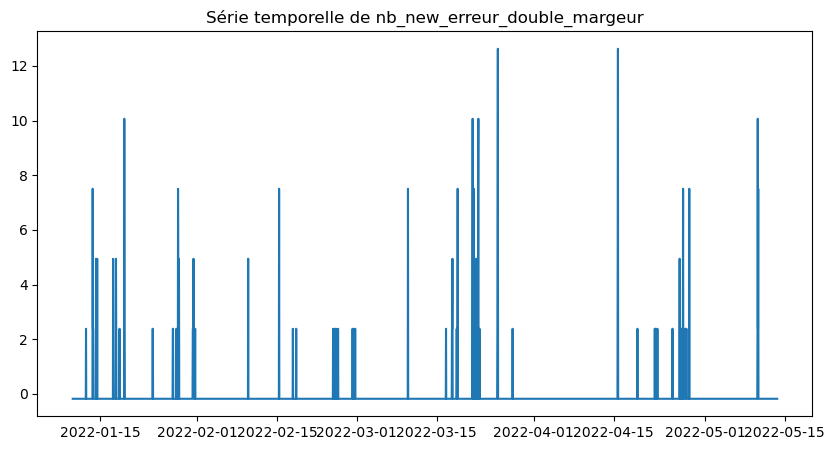

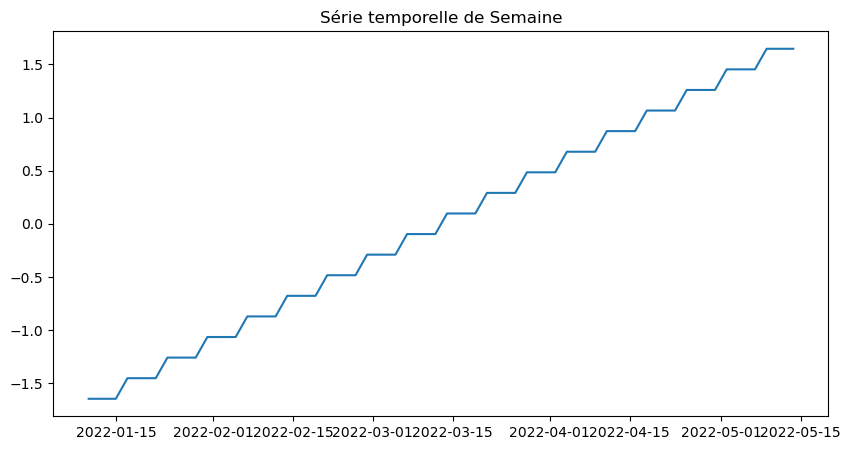

In [152]:
for var in variable_3 :
    
    plt.figure(figsize=(10, 5))
    
    plt.plot(df6_3.index, df6_3[var])
    
    plt.title(f'Série temporelle de {var}')
    
    plt.show()

#### 4.1.3.3. Suppression de la saisonnalité et de la tendance

In [153]:
df6_3_resid = pd.DataFrame()

for var in variable_3 :
    stl_decomp = STL(endog= df6_3[var], period= 15*24).fit()
    df6_3_resid[var] = stl_decomp.resid

df6_3_resid.head(3)

,nb_new_products,nb_arret_panne,nb_new_erreur_encre,nb_new_erreur_agv,nb_new_erreur_shur,nb_new_erreur_stacker,nb_new_erreur_double_margeur,Semaine
time,,,,,,,,
2022-01-10 05:00:00,-0.246148,0.094232,0.135486,-0.189381,-0.857268,0.081446,-0.069288,-8.881784e-16
2022-01-10 06:00:00,-0.179581,-0.099109,-0.167792,0.398356,0.871524,-0.213257,-1.057868,-3.108624e-15
2022-01-10 07:00:00,-0.770898,-0.187979,0.036834,1.828817,2.587978,0.162841,-1.058036,0.000000e+00


## 4.2. Variable d'intérêt : nb_arret_panne

# 5. Machine Learning

In [41]:
date_limit = pd.to_datetime("2022-05-11 00:00:00")

X = df7.drop(['nb_new_products'], axis=1)
y = df7['nb_new_products']

X_train = X[X.index < date_limit].dropna()
y_train = y[y.index < date_limit].dropna()

X_test = X[X.index >= date_limit].dropna()
y_test = y[y.index >= date_limit].dropna()

Xbis = df7bis.drop(['nb_new_products'], axis=1)
ybis = df7bis['nb_new_products']

X_trainbis = Xbis[Xbis.index < date_limit].dropna()
y_trainbis = ybis[ybis.index < date_limit].dropna()

X_testbis = Xbis[Xbis.index >= date_limit].dropna()
y_testbis = ybis[ybis.index >= date_limit].dropna()

Xresid = df_resid.drop(['nb_new_products'], axis=1)
yresid = df_resid['nb_new_products']

X_trainresid = Xresid[Xresid.index < date_limit].dropna()
y_trainresid = yresid[yresid.index < date_limit].dropna()

X_testresid = Xbis[Xresid.index >= date_limit].dropna()
y_testresid = ybis[yresid.index >= date_limit].dropna()

## 5.1. Gradient Boosting Regressor

### 5.1.1. Variables prédictrices : nb_arret_panne et semaine

#### 5.1.1.1. Suppression de la saisonnalité et de la tendance

In [42]:
gbr_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth":[2, 3, 4, 5],
    "n_estimators":[25, 40, 50]
}

grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=50, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbr.fit(X_trainresid, y_trainresid)

print(grid_search_gbr.best_params_)

y_pred = grid_search_gbr.predict(X_testresid)
mse = mean_squared_error(y_testresid, y_pred)
r2 = r2_score(y_testresid, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Fitting 50 folds for each of 48 candidates, totalling 2400 fits
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 40}
Mean Squared Error: 1.442281722007116
R2 Score: -0.12838097275286908


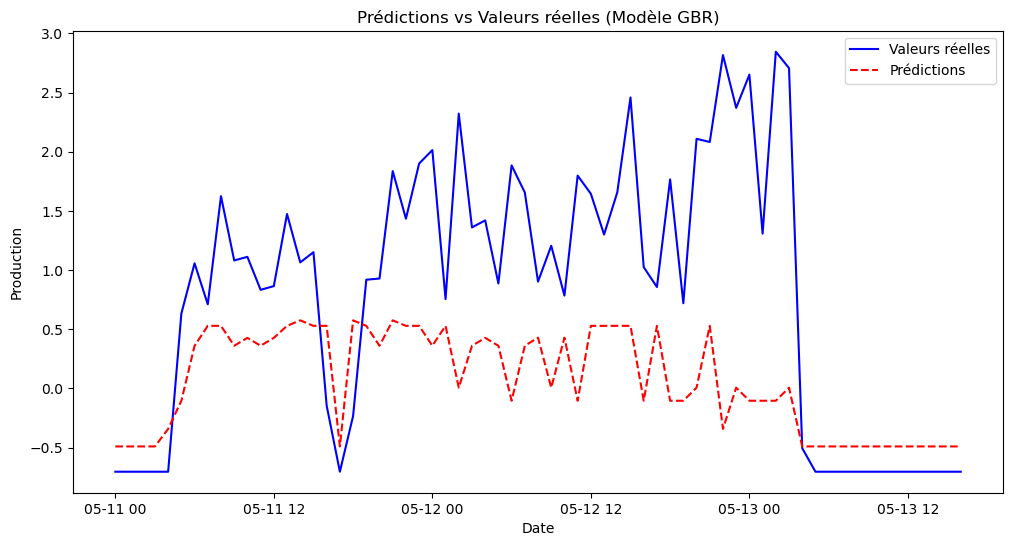

In [43]:
y_pred_series = pd.Series(y_pred, index=X_testresid.index)

y_testresid = y_testresid.sort_index()
y_pred_series = y_pred_series.sort_index()

plt.figure(figsize=(12,6))

plt.plot(y_testresid.index, y_testresid.values, label='Valeurs réelles', color='blue')
plt.plot(y_pred_series.index, y_pred_series.values, label='Prédictions', color='red', linestyle='--')

plt.legend()
plt.title('Prédictions vs Valeurs réelles (Modèle GBR)')
plt.xlabel('Date')
plt.ylabel('Production')

plt.show()

#### 5.1.1.2. Maintien de la saisonnalité et de la tendance

In [44]:
gbr_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth":[2, 3, 4, 5],
    "n_estimators":[25, 40, 50]
}

grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=50, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbr.fit(X_trainbis, y_trainbis)

print(grid_search_gbr.best_params_)

y_pred = grid_search_gbr.predict(X_testbis)
mse = mean_squared_error(y_testbis, y_pred)
r2 = r2_score(y_testbis, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Fitting 50 folds for each of 48 candidates, totalling 2400 fits
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 40}
Mean Squared Error: 0.4855538436358442
R2 Score: 0.6201229551441232


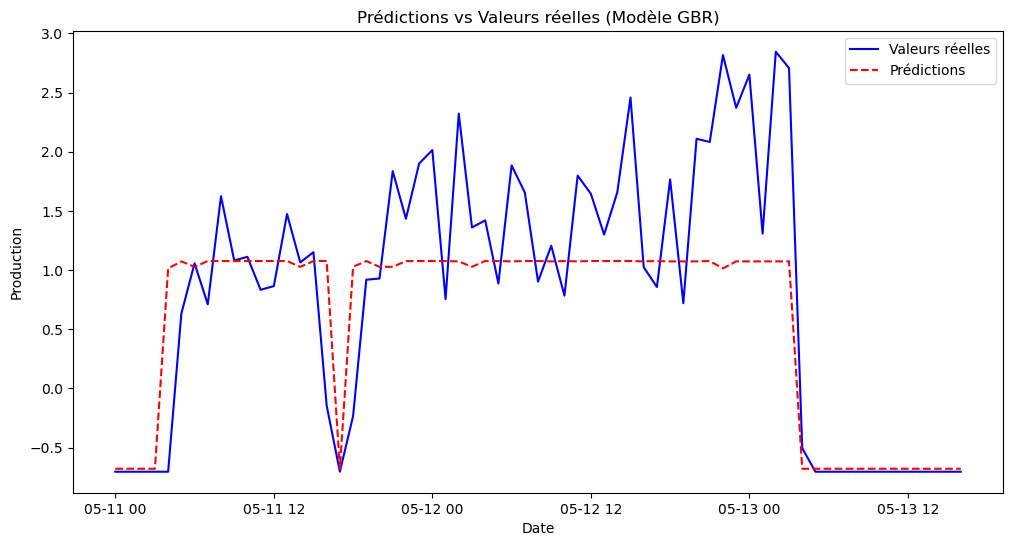

In [45]:
y_pred_series = pd.Series(y_pred, index=X_testbis.index)

y_testbis = y_testbis.sort_index()
y_pred_series = y_pred_series.sort_index()

plt.figure(figsize=(12,6))

plt.plot(y_testbis.index, y_testbis.values, label='Valeurs réelles', color='blue')
plt.plot(y_pred_series.index, y_pred_series.values, label='Prédictions', color='red', linestyle='--')

plt.legend()
plt.title('Prédictions vs Valeurs réelles (Modèle GBR)')
plt.xlabel('Date')
plt.ylabel('Production')

plt.show()

### 5.1.2. Variables prédictrices : nb_arret_panne, nb_new_erreur_encre, nb_new_erreur_agv, nb_new_erreur_shur, nb_new_erreur_stacker, nb_new_erreur_margeur_double, semaine

In [46]:
gbr_model = GradientBoostingRegressor(random_state=42)

param_grid = {
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "max_depth":[2, 3, 4, 5],
    "n_estimators":[25, 40, 50]
}

grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=50, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)

print(grid_search_gbr.best_params_)

y_pred = grid_search_gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Fitting 50 folds for each of 48 candidates, totalling 2400 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 40}
Mean Squared Error: 0.3688055608059744
R2 Score: 0.7114619348570934


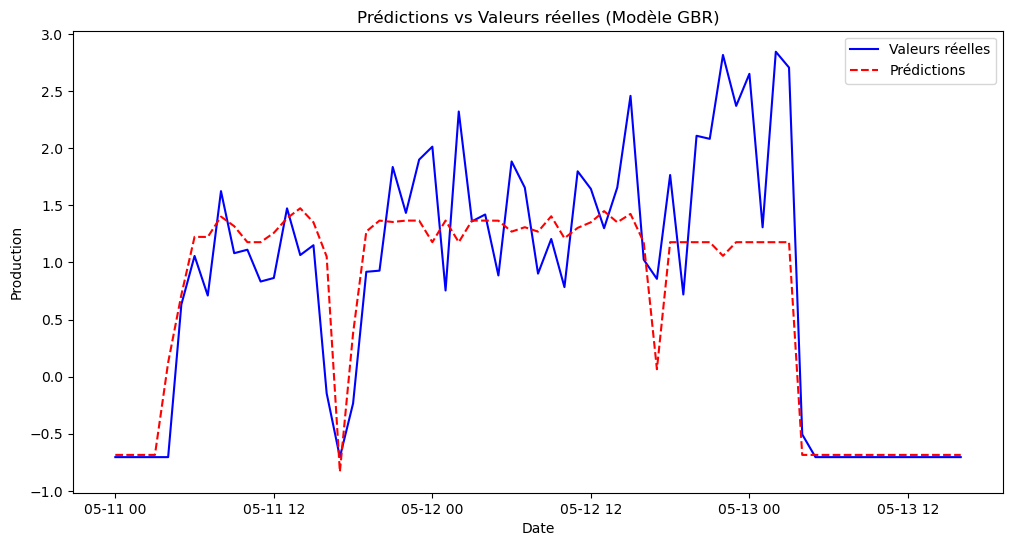

In [47]:
y_pred_series = pd.Series(y_pred, index=X_test.index)

y_test = y_test.sort_index()
y_pred_series = y_pred_series.sort_index()

plt.figure(figsize=(12,6))

plt.plot(y_test.index, y_test.values, label='Valeurs réelles', color='blue')
plt.plot(y_pred_series.index, y_pred_series.values, label='Prédictions', color='red', linestyle='--')

plt.legend()
plt.title('Prédictions vs Valeurs réelles (Modèle GBR)')
plt.xlabel('Date')
plt.ylabel('Production')

plt.show()

## 5.2. Random Forest Regressor

### 5.2.1. Variables prédictrices : nb_arret_panne et semaine

#### 5.2.1.1. Suppression de la tendance et de la saisonnalité

In [48]:
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [40, 50, 60],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [3, 4, 5]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=50, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_trainresid, y_trainresid)

print(grid_search_rf.best_params_)

y_pred_rf = grid_search_rf.predict(X_testresid)

mse_rf = mean_squared_error(y_testresid, y_pred_rf)
r2_rf = r2_score(y_testresid, y_pred_rf)

print('Mean Squared Error:', mse_rf)
print('R2 Score:', r2_rf)

Fitting 50 folds for each of 108 candidates, totalling 5400 fits
{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 60}
Mean Squared Error: 1.4321111570778922
R2 Score: -0.12042394759393349


C:\Users\MS6283\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MS6283\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MS6283\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\MS6283\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\MS6283\Anaconda3\lib\site-

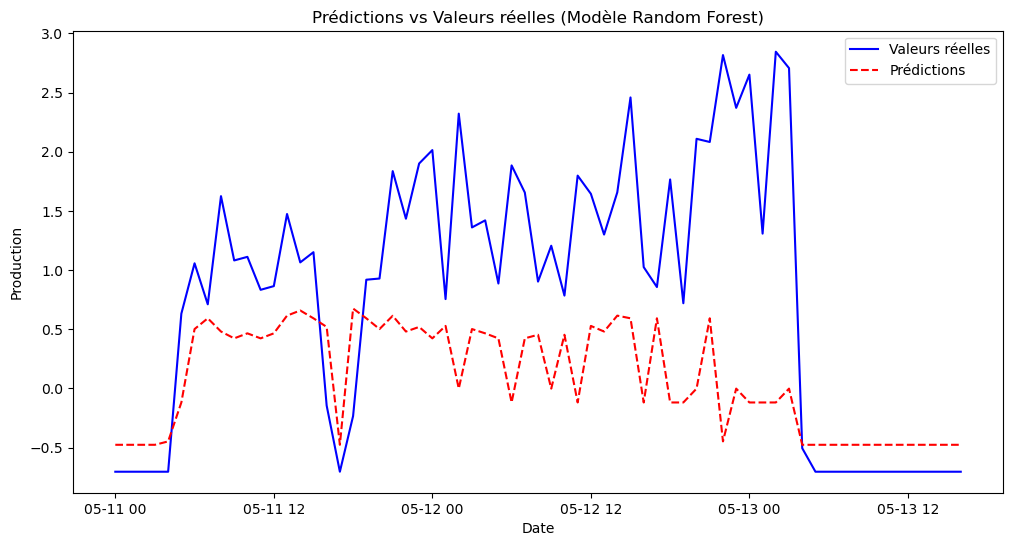

In [49]:
y_pred_series = pd.Series(y_pred_rf, index=X_testresid.index)

y_testresid = y_testresid.sort_index()
y_pred_series = y_pred_series.sort_index()

plt.figure(figsize=(12,6))

plt.plot(y_testresid.index, y_testresid.values, label='Valeurs réelles', color='blue')
plt.plot(y_pred_series.index, y_pred_series.values, label='Prédictions', color='red', linestyle='--')

plt.legend()
plt.title('Prédictions vs Valeurs réelles (Modèle Random Forest)')
plt.xlabel('Date')
plt.ylabel('Production')

plt.show()

#### 5.2.1.2. Maintien de la saisonnalité et de la tendance

In [50]:
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [40, 50, 60],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [3, 4, 5]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=50, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_trainbis, y_trainbis)

print(grid_search_rf.best_params_)

y_pred_rf = grid_search_rf.predict(X_testbis)

mse_rf = mean_squared_error(y_testbis, y_pred_rf)
r2_rf = r2_score(y_testbis, y_pred_rf)

print('Mean Squared Error:', mse_rf)
print('R2 Score:', r2_rf)

Fitting 50 folds for each of 108 candidates, totalling 5400 fits


C:\Users\MS6283\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MS6283\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MS6283\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\MS6283\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\MS6283\Anaconda3\lib\site-

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 60}
Mean Squared Error: 0.566105910253625
R2 Score: 0.5571023830183559


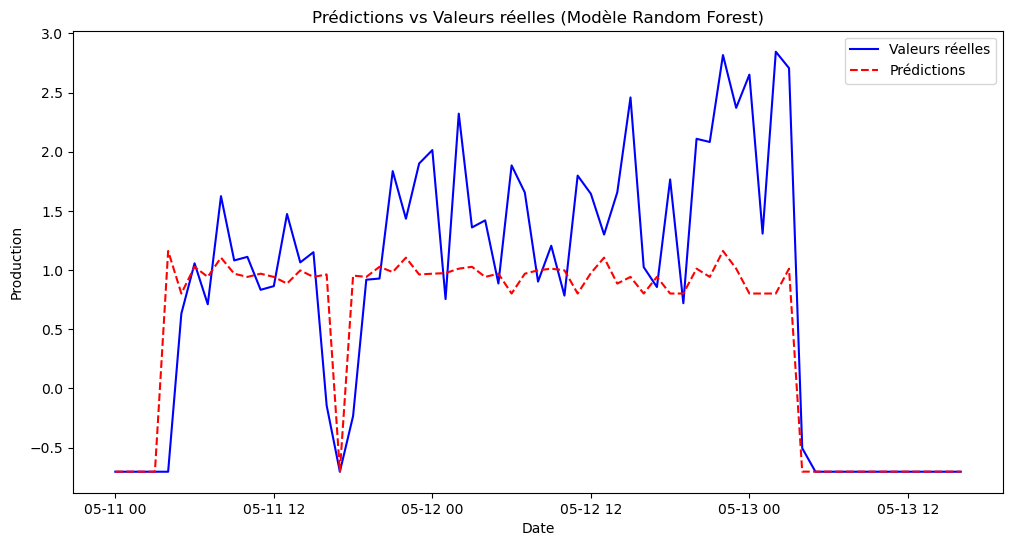

In [51]:
y_pred_series = pd.Series(y_pred_rf, index=X_testbis.index)

y_testbis = y_testbis.sort_index()
y_pred_series = y_pred_series.sort_index()

plt.figure(figsize=(12,6))

plt.plot(y_testbis.index, y_testbis.values, label='Valeurs réelles', color='blue')
plt.plot(y_pred_series.index, y_pred_series.values, label='Prédictions', color='red', linestyle='--')

plt.legend()
plt.title('Prédictions vs Valeurs réelles (Modèle Random Forest)')
plt.xlabel('Date')
plt.ylabel('Production')

plt.show()

### 5.2.2. Variables prédictrices : nb_arret_panne, nb_new_erreur_encre, nb_new_erreur_agv, nb_new_erreur_shur, nb_new_erreur_stacker, nb_new_erreur_margeur_double, semaine

In [52]:
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [40, 50, 60],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [3, 4, 5]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=50, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print(grid_search_rf.best_params_)

y_pred_rf = grid_search_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('Mean Squared Error:', mse_rf)
print('R2 Score:', r2_rf)

Fitting 50 folds for each of 108 candidates, totalling 5400 fits
{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error: 0.40148941021179524
R2 Score: 0.6858914563416162


C:\Users\MS6283\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MS6283\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MS6283\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\MS6283\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\MS6283\Anaconda3\lib\site-

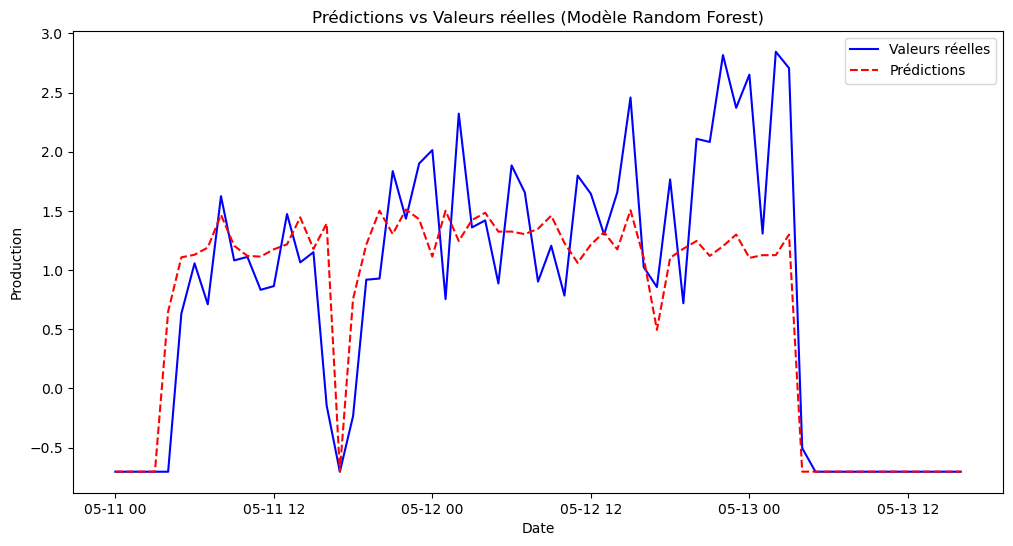

In [53]:
y_pred_series = pd.Series(y_pred_rf, index=X_test.index)

y_test = y_test.sort_index()
y_pred_series = y_pred_series.sort_index()

plt.figure(figsize=(12,6))

plt.plot(y_test.index, y_test.values, label='Valeurs réelles', color='blue')
plt.plot(y_pred_series.index, y_pred_series.values, label='Prédictions', color='red', linestyle='--')

plt.legend()
plt.title('Prédictions vs Valeurs réelles (Modèle Random Forest)')
plt.xlabel('Date')
plt.ylabel('Production')

plt.show()

## 5.3. Modèle Support Vectoriel Regressor

### 5.3.1. Variables prédictrices : nb_arret_panne et semaine

#### 5.3.1.1. Suppression de la saisonnalité et de la tendance

In [54]:
svr_model = SVR()

param_grid_svr = {
    'C': [0.01, 0.1, 1], 
    'gamma': ['scale', 'auto', 0.1, 1, 1.5], 
    'kernel': ['poly', 'rbf'] 
}

grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_svr.fit(X_trainresid, y_trainresid)

print(grid_search_svr.best_params_)
y_pred_svr = grid_search_svr.predict(X_testresid)

mse_svr = mean_squared_error(y_testresid, y_pred_svr)
r2_svr = r2_score(y_testresid, y_pred_svr)

print('Mean Squared Error:', mse_svr)
print('R2 Score:', r2_svr)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Squared Error: 1.7906208446840544
R2 Score: -0.40090695162133416


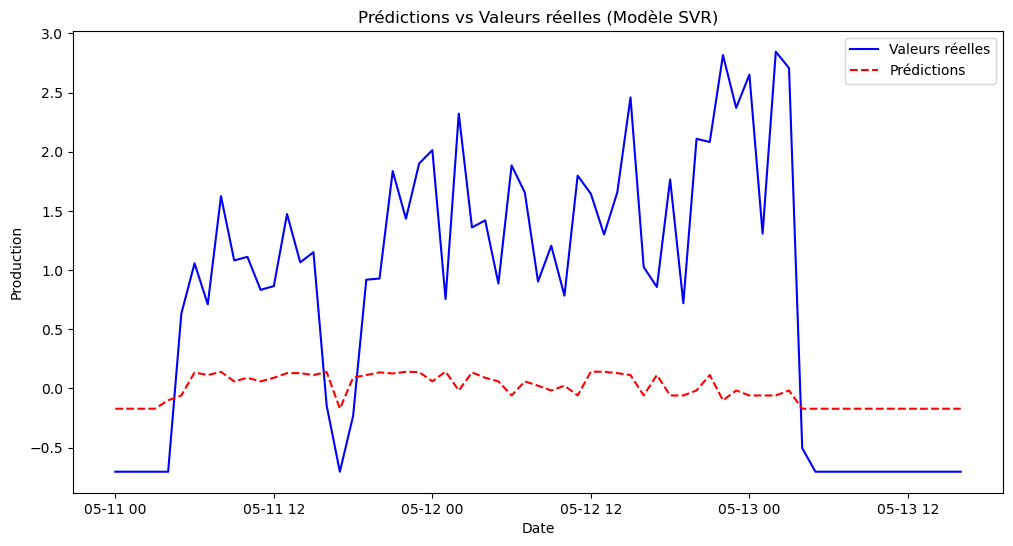

In [55]:
y_pred_series = pd.Series(y_pred_svr, index=X_testresid.index)

y_testresid = y_testresid.sort_index()
y_pred_series = y_pred_series.sort_index()

plt.figure(figsize=(12,6))

plt.plot(y_testresid.index, y_testresid.values, label='Valeurs réelles', color='blue')
plt.plot(y_pred_series.index, y_pred_series.values, label='Prédictions', color='red', linestyle='--')

plt.legend()
plt.title('Prédictions vs Valeurs réelles (Modèle SVR)')
plt.xlabel('Date')
plt.ylabel('Production')

plt.show()

#### 5.3.1.2. Maintien de la saisonnalité et de la tendance

In [56]:
svr_model = SVR()

param_grid_svr = {
    'C': [0.01, 0.1, 1], 
    'gamma': ['scale', 'auto', 0.1, 1, 1.5], 
    'kernel': ['poly', 'rbf'] 
}

grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_svr.fit(X_trainbis, y_trainbis)

print(grid_search_svr.best_params_)
y_pred_svr = grid_search_svr.predict(X_testbis)

mse_svr = mean_squared_error(y_testbis, y_pred_svr)
r2_svr = r2_score(y_testbis, y_pred_svr)

print('Mean Squared Error:', mse_svr)
print('R2 Score:', r2_svr)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Squared Error: 0.6151959113068813
R2 Score: 0.5186964167666117


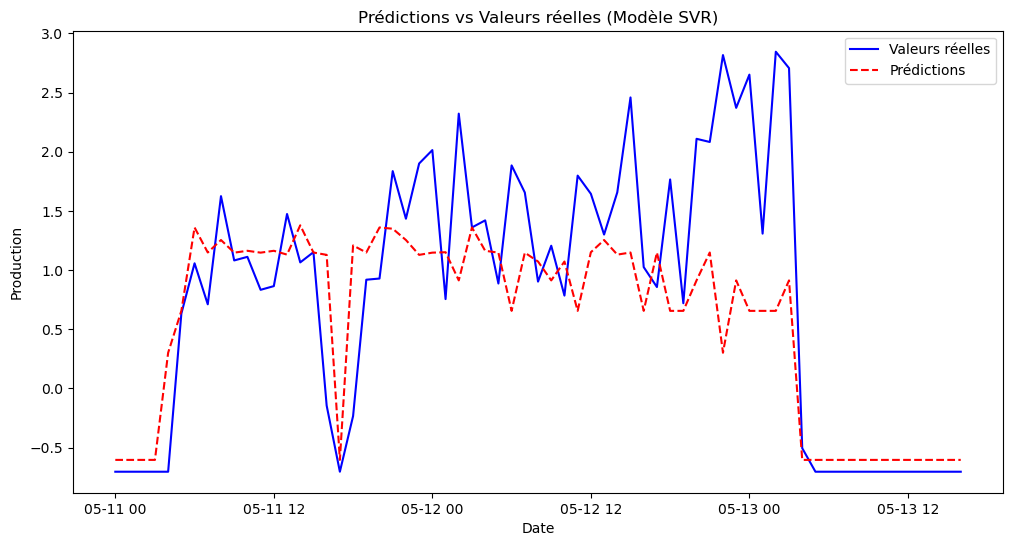

In [57]:
y_pred_series = pd.Series(y_pred_svr, index=X_testbis.index)

y_testbis = y_testbis.sort_index()
y_pred_series = y_pred_series.sort_index()

plt.figure(figsize=(12,6))

plt.plot(y_testbis.index, y_testbis.values, label='Valeurs réelles', color='blue')
plt.plot(y_pred_series.index, y_pred_series.values, label='Prédictions', color='red', linestyle='--')

plt.legend()
plt.title('Prédictions vs Valeurs réelles (Modèle SVR)')
plt.xlabel('Date')
plt.ylabel('Production')

plt.show()

### 5.3.2. Variables prédictrices : nb_arret_panne, nb_new_erreur_encre, nb_new_erreur_agv, nb_new_erreur_shur, nb_new_erreur_stacker, nb_new_erreur_margeur_double, semaine

In [58]:
svr_model = SVR()

param_grid_svr = {
    'C': [0.01, 0.1, 1], 
    'gamma': ['scale', 'auto', 0.1, 1, 1.5], 
    'kernel': ['poly', 'rbf'] 
}

grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_svr.fit(X_train, y_train)

print(grid_search_svr.best_params_)
y_pred_svr = grid_search_svr.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print('Mean Squared Error:', mse_svr)
print('R2 Score:', r2_svr)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Mean Squared Error: 0.6335925925379238
R2 Score: 0.5043036218319161


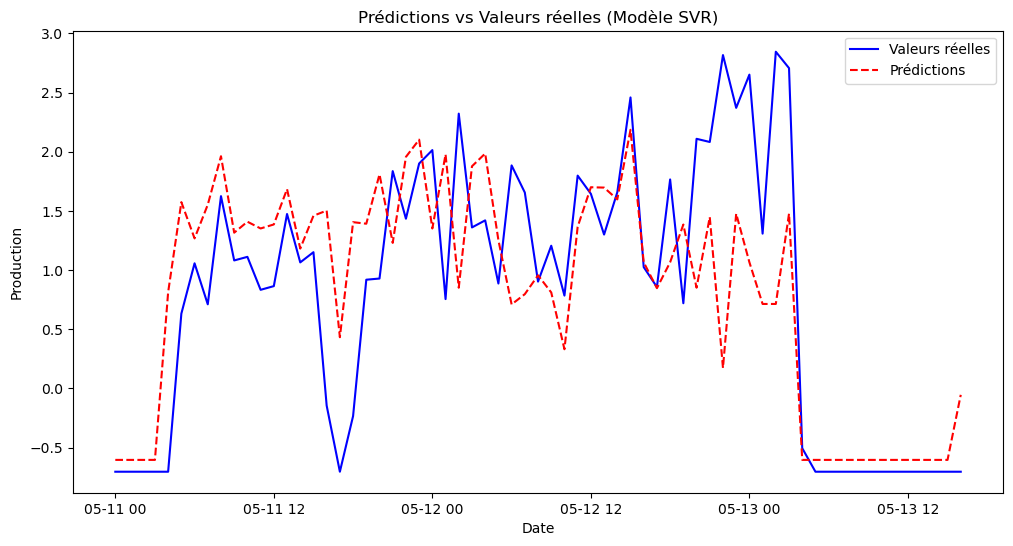

In [59]:
y_pred_series = pd.Series(y_pred_svr, index=X_test.index)

y_test = y_test.sort_index()
y_pred_series = y_pred_series.sort_index()

plt.figure(figsize=(12,6))

plt.plot(y_test.index, y_test.values, label='Valeurs réelles', color='blue')
plt.plot(y_pred_series.index, y_pred_series.values, label='Prédictions', color='red', linestyle='--')

plt.legend()
plt.title('Prédictions vs Valeurs réelles (Modèle SVR)')
plt.xlabel('Date')
plt.ylabel('Production')

plt.show()

# 6. Deep Learning

In [60]:
def format_data(X, y, seq_length):
    X_values = []
    y_values = []

    for i in range(len(X) - seq_length):
        X_seq = X[i:(i + seq_length)].values
        y_seq = y[i + seq_length] 
        
        X_values.append(X_seq)
        y_values.append(y_seq)

    return np.array(X_values), np.array(y_values)

seq_length = 24 
X_train2, y_train2 = format_data(X_train, y_train, seq_length)
X_test2, y_test2 = format_data(X_test, y_test, seq_length)

print(X_train2.shape) 
print(y_train2.shape)  

(2059, 24, 7)
(2059,)


## 6.1. Modèle simple

In [61]:
def root_mean_squared_error(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 


def create_model(trial):
    units1 = trial.suggest_categorical('units1', [16, 32, 64, 128, 256, 352])
    activation1 = trial.suggest_categorical('activation1', ['relu', 'sigmoid', 'tanh', 'elu', 'softplus'])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'elu'])
    learning_rate = trial.suggest_float('learning_rate', 1e-1, 0.3, log=True)

    model = Sequential()
    
    model.add(LSTM(units=units1, activation=activation1, input_shape=(24, 7)))
    model.add(Dense(1, activation=activation2))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss=root_mean_squared_error)
    return model

def objective(trial):
    model = create_model(trial)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(
        X_train2, 
        y_train2, 
        epochs=50, 
        batch_size=64, 
        verbose=0, 
        validation_split=0.2,
        callbacks=[early_stopping]
    )

    loss = model.evaluate(X_test2, y_test2, verbose=0)
    return loss

study = optuna.create_study(direction='minimize') 
study.optimize(objective, n_trials=50)

best_trial = study.best_trial

print("Best trial:")
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

best_params = best_trial.params

print('Best parameters:', best_params)
print('Best score:', best_trial.value)

best_model = create_model(optuna.trial.FixedTrial(best_params))

[I 2023-05-21 05:45:22,714] A new study created in memory with name: no-name-e4e38c4a-c864-4d1a-83ea-b069fb6e2514
[W 2023-05-21 05:46:02,590] Trial 0 failed with parameters: {'units1': 352, 'activation1': 'elu', 'activation2': 'relu', 'learning_rate': 0.17246067315069832} because of the following error: The value nan is not acceptable..
[W 2023-05-21 05:46:02,591] Trial 0 failed with value nan.
[I 2023-05-21 05:46:08,542] Trial 1 finished with value: 2.089496374130249 and parameters: {'units1': 32, 'activation1': 'relu', 'activation2': 'elu', 'learning_rate': 0.26558386005026063}. Best is trial 1 with value: 2.089496374130249.
[I 2023-05-21 05:46:13,504] Trial 2 finished with value: 1.4914675951004028 and parameters: {'units1': 32, 'activation1': 'relu', 'activation2': 'relu', 'learning_rate': 0.12083168975794434}. Best is trial 2 with value: 1.4914675951004028.
[W 2023-05-21 05:46:35,496] Trial 3 failed with parameters: {'units1': 256, 'activation1': 'relu', 'activation2': 'relu', 'le

[I 2023-05-21 05:56:23,833] Trial 31 finished with value: 1.4557794332504272 and parameters: {'units1': 16, 'activation1': 'tanh', 'activation2': 'relu', 'learning_rate': 0.11685945263417344}. Best is trial 23 with value: 1.0178757905960083.
[I 2023-05-21 05:56:29,632] Trial 32 finished with value: 1.4914675951004028 and parameters: {'units1': 16, 'activation1': 'sigmoid', 'activation2': 'relu', 'learning_rate': 0.10109661321215059}. Best is trial 23 with value: 1.0178757905960083.
[I 2023-05-21 05:57:10,701] Trial 33 finished with value: 2.089496374130249 and parameters: {'units1': 128, 'activation1': 'tanh', 'activation2': 'elu', 'learning_rate': 0.14872697661092577}. Best is trial 23 with value: 1.0178757905960083.
[I 2023-05-21 05:57:22,425] Trial 34 finished with value: 1.4914675951004028 and parameters: {'units1': 64, 'activation1': 'tanh', 'activation2': 'relu', 'learning_rate': 0.13540902409543565}. Best is trial 23 with value: 1.0178757905960083.
[I 2023-05-21 05:58:17,170] Tr

Best trial:
  Value:  0.9395276308059692
  Params: 
    units1: 16
    activation1: tanh
    activation2: relu
    learning_rate: 0.10865543385639234
Best parameters: {'units1': 16, 'activation1': 'tanh', 'activation2': 'relu', 'learning_rate': 0.10865543385639234}
Best score: 0.9395276308059692


In [62]:
history = best_model.fit(X_train2,
                         y_train2,
                         validation_data=(X_test2, y_test2), 
                         epochs=50)

Epoch 1/50
65/65 [==============================] - 3s 18ms/step - loss: 0.8649 - val_loss: 1.0421
Epoch 2/50
65/65 [==============================] - 1s 14ms/step - loss: 0.8324 - val_loss: 0.8267
Epoch 3/50
65/65 [==============================] - 1s 15ms/step - loss: 0.8531 - val_loss: 1.3467
Epoch 4/50
65/65 [==============================] - 1s 16ms/step - loss: 0.8698 - val_loss: 0.9414
Epoch 5/50
65/65 [==============================] - 1s 14ms/step - loss: 0.8182 - val_loss: 0.8003
Epoch 6/50
65/65 [==============================] - 1s 14ms/step - loss: 0.8025 - val_loss: 0.9964
Epoch 7/50
65/65 [==============================] - 1s 13ms/step - loss: 0.8006 - val_loss: 1.0555
Epoch 8/50
65/65 [==============================] - 1s 13ms/step - loss: 0.7893 - val_loss: 0.9695
Epoch 9/50
65/65 [==============================] - 1s 16ms/step - loss: 0.7797 - val_loss: 0.9081
Epoch 10/50
65/65 [==============================] - 1s 14ms/step - loss: 0.7811 - val_loss: 1.2705
Epoch 11/

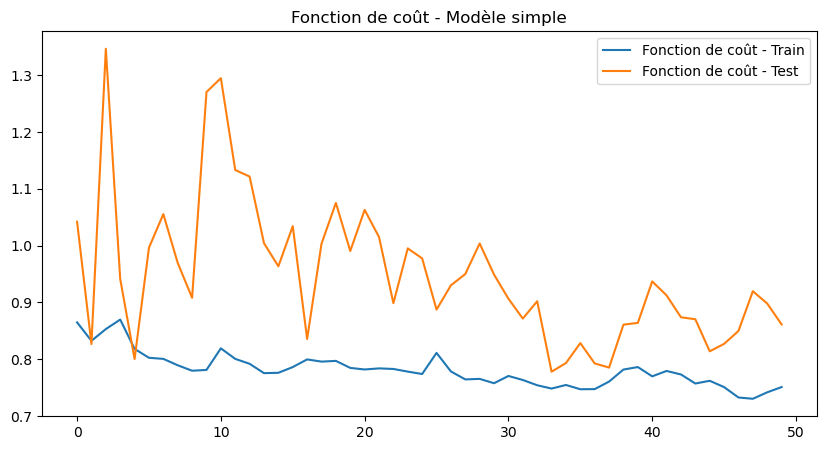

In [63]:
plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'], label='Fonction de coût - Train')
plt.plot(history.history['val_loss'], label='Fonction de coût - Test')
plt.legend()
plt.title('Fonction de coût - Modèle simple')

plt.show()

## 6.2. Modèle intermédiaire

In [64]:
def root_mean_squared_error(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 


def create_model(trial):
    units1 = trial.suggest_categorical('units1', [64, 128, 256, 352])
    units2 = trial.suggest_categorical('units2', [4, 8, 16, 32, 64])
    activation1 = trial.suggest_categorical('activation1', ['relu', 'sigmoid', 'tanh', 'elu', 'softplus'])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'sigmoid', 'tanh', 'elu', 'softplus'])
    activation3 = trial.suggest_categorical('activation3', ['relu', 'elu'])
    learning_rate = trial.suggest_float('learning_rate', 1e-1, 0.3, log=True)

    model = Sequential()
    
    model.add(LSTM(units=units1, activation=activation1, input_shape=(24, 7)))
    model.add(Dense(units=units2, activation=activation2))
    model.add(Dense(1, activation=activation3))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss=root_mean_squared_error)
    return model

def objective(trial):
    model = create_model(trial)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(
        X_train2, 
        y_train2, 
        epochs=50, 
        batch_size=64, 
        verbose=0, 
        validation_split=0.2,
        callbacks=[early_stopping]
    )

    loss = model.evaluate(X_test2, y_test2, verbose=0)
    return loss

study = optuna.create_study(direction='minimize') 
study.optimize(objective, n_trials=50)

best_trial = study.best_trial

print("Best trial:")
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

best_params = best_trial.params

print('Best parameters:', best_params)
print('Best score:', best_trial.value)

best_model = create_model(optuna.trial.FixedTrial(best_params))

[I 2023-05-21 06:12:05,287] A new study created in memory with name: no-name-3da47a1d-8006-4775-9b71-9216bc2903cf
[I 2023-05-21 06:14:25,060] Trial 0 finished with value: 1.4833054542541504 and parameters: {'units1': 352, 'units2': 4, 'activation1': 'sigmoid', 'activation2': 'tanh', 'activation3': 'elu', 'learning_rate': 0.16502456648703778}. Best is trial 0 with value: 1.4833054542541504.
[I 2023-05-21 06:15:45,065] Trial 1 finished with value: 1.4914675951004028 and parameters: {'units1': 352, 'units2': 4, 'activation1': 'sigmoid', 'activation2': 'softplus', 'activation3': 'relu', 'learning_rate': 0.1685299637164249}. Best is trial 0 with value: 1.4833054542541504.
[I 2023-05-21 06:16:22,715] Trial 2 finished with value: 1.4914675951004028 and parameters: {'units1': 128, 'units2': 8, 'activation1': 'elu', 'activation2': 'sigmoid', 'activation3': 'relu', 'learning_rate': 0.24130582992310035}. Best is trial 0 with value: 1.4833054542541504.
[I 2023-05-21 06:16:36,340] Trial 3 finished 

[W 2023-05-21 06:44:15,806] Trial 25 failed with value nan.
[W 2023-05-21 06:45:39,238] Trial 26 failed with parameters: {'units1': 352, 'units2': 4, 'activation1': 'softplus', 'activation2': 'tanh', 'activation3': 'elu', 'learning_rate': 0.10158320723757952} because of the following error: The value nan is not acceptable..
[W 2023-05-21 06:45:39,239] Trial 26 failed with value nan.
[W 2023-05-21 06:47:01,857] Trial 27 failed with parameters: {'units1': 352, 'units2': 4, 'activation1': 'softplus', 'activation2': 'tanh', 'activation3': 'elu', 'learning_rate': 0.10776087518753015} because of the following error: The value nan is not acceptable..
[W 2023-05-21 06:47:01,858] Trial 27 failed with value nan.
[W 2023-05-21 06:48:22,548] Trial 28 failed with parameters: {'units1': 352, 'units2': 4, 'activation1': 'softplus', 'activation2': 'tanh', 'activation3': 'elu', 'learning_rate': 0.10767309911438777} because of the following error: The value nan is not acceptable..
[W 2023-05-21 06:48:22

[W 2023-05-21 07:19:58,653] Trial 49 failed with value nan.


Best trial:
  Value:  1.364898681640625
  Params: 
    units1: 352
    units2: 4
    activation1: tanh
    activation2: tanh
    activation3: elu
    learning_rate: 0.12614683810614732
Best parameters: {'units1': 352, 'units2': 4, 'activation1': 'tanh', 'activation2': 'tanh', 'activation3': 'elu', 'learning_rate': 0.12614683810614732}
Best score: 1.364898681640625


In [65]:
history = best_model.fit(X_train2,
                         y_train2,
                         validation_data=(X_test2, y_test2), 
                         epochs=50)

Epoch 1/50
65/65 [==============================] - 17s 235ms/step - loss: 1.0144 - val_loss: 1.5223
Epoch 2/50
65/65 [==============================] - 14s 217ms/step - loss: 0.9991 - val_loss: 1.5225
Epoch 3/50
65/65 [==============================] - 14s 215ms/step - loss: 0.9890 - val_loss: 1.3201
Epoch 4/50
65/65 [==============================] - 14s 212ms/step - loss: 1.0022 - val_loss: 1.5396
Epoch 5/50
65/65 [==============================] - 15s 232ms/step - loss: 0.9900 - val_loss: 1.5789
Epoch 6/50
65/65 [==============================] - 15s 224ms/step - loss: 0.9977 - val_loss: 1.5548
Epoch 7/50
65/65 [==============================] - 14s 220ms/step - loss: 1.0032 - val_loss: 1.3729
Epoch 8/50
65/65 [==============================] - 15s 225ms/step - loss: 1.0124 - val_loss: 1.6300
Epoch 9/50
65/65 [==============================] - 14s 221ms/step - loss: 0.9940 - val_loss: 1.5197
Epoch 10/50
65/65 [==============================] - 14s 223ms/step - loss: 0.9984 - val_lo

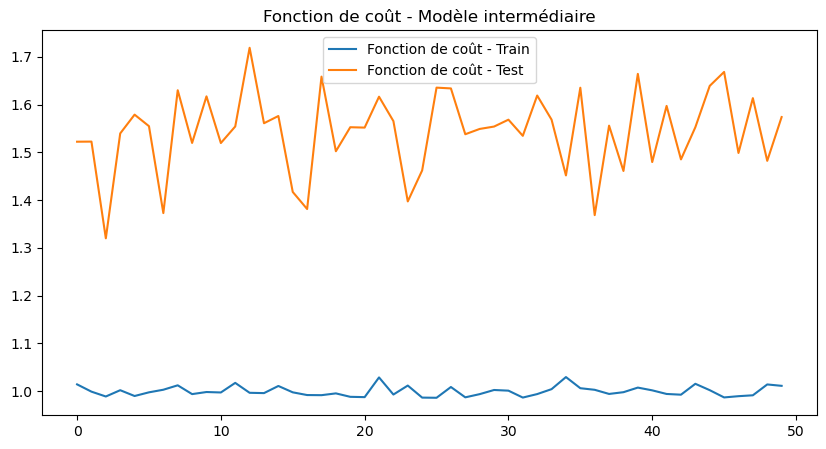

In [66]:
plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'], label='Fonction de coût - Train')
plt.plot(history.history['val_loss'], label='Fonction de coût - Test')
plt.legend()
plt.title('Fonction de coût - Modèle intermédiaire')

plt.show()

## 6.3. Modèle complexe

In [67]:
def root_mean_squared_error(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 


def create_model(trial):
    units1 = trial.suggest_categorical('units1', [64, 128, 256, 352])
    units2 = trial.suggest_categorical('units2', [16, 32, 64])
    units3 = trial.suggest_categorical('units3', [2, 4, 8, 16])
    activation1 = trial.suggest_categorical('activation1', ['relu', 'sigmoid', 'tanh', 'elu', 'softplus'])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'sigmoid', 'tanh', 'elu', 'softplus'])
    activation3 = trial.suggest_categorical('activation3', ['relu', 'sigmoid', 'tanh', 'elu', 'softplus'])
    activation4 = trial.suggest_categorical('activation4', ['relu', 'elu'])
    learning_rate = trial.suggest_float('learning_rate', 1e-1, 0.3, log=True)

    model = Sequential()
    
    model.add(LSTM(units=units1, activation=activation1, input_shape=(24, 7)))
    model.add(Dense(units=units2, activation=activation2))
    model.add(Dense(units=units3, activation=activation3))
    model.add(Dense(1, activation=activation4))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss=root_mean_squared_error)
    return model

def objective(trial):
    model = create_model(trial)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(
        X_train2, 
        y_train2, 
        epochs=50, 
        batch_size=64, 
        verbose=0, 
        validation_split=0.2,
        callbacks=[early_stopping]
    )

    loss = model.evaluate(X_test2, y_test2, verbose=0)
    return loss

study = optuna.create_study(direction='minimize') 
study.optimize(objective, n_trials=50)

best_trial = study.best_trial

print("Best trial:")
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

best_params = best_trial.params

print('Best parameters:', best_params)
print('Best score:', best_trial.value)

best_model = create_model(optuna.trial.FixedTrial(best_params))

[I 2023-05-21 07:31:57,777] A new study created in memory with name: no-name-c0cc565c-4167-4f49-9ae9-7910e763ca90
[W 2023-05-21 07:33:13,650] Trial 0 failed with parameters: {'units1': 256, 'units2': 32, 'units3': 4, 'activation1': 'elu', 'activation2': 'tanh', 'activation3': 'tanh', 'activation4': 'relu', 'learning_rate': 0.2011290427513708} because of the following error: The value nan is not acceptable..
[W 2023-05-21 07:33:13,651] Trial 0 failed with value nan.
[I 2023-05-21 07:33:36,918] Trial 1 finished with value: 1.4914675951004028 and parameters: {'units1': 64, 'units2': 64, 'units3': 2, 'activation1': 'sigmoid', 'activation2': 'sigmoid', 'activation3': 'softplus', 'activation4': 'relu', 'learning_rate': 0.1573392875571925}. Best is trial 1 with value: 1.4914675951004028.
[I 2023-05-21 07:34:55,002] Trial 2 finished with value: 1.4914675951004028 and parameters: {'units1': 256, 'units2': 32, 'units3': 4, 'activation1': 'tanh', 'activation2': 'relu', 'activation3': 'elu', 'acti

[W 2023-05-21 08:05:44,390] Trial 23 failed with parameters: {'units1': 352, 'units2': 16, 'units3': 8, 'activation1': 'relu', 'activation2': 'elu', 'activation3': 'tanh', 'activation4': 'elu', 'learning_rate': 0.25165063227299256} because of the following error: The value nan is not acceptable..
[W 2023-05-21 08:05:44,391] Trial 23 failed with value nan.
[W 2023-05-21 08:07:14,187] Trial 24 failed with parameters: {'units1': 352, 'units2': 16, 'units3': 8, 'activation1': 'softplus', 'activation2': 'elu', 'activation3': 'tanh', 'activation4': 'elu', 'learning_rate': 0.2515981418007737} because of the following error: The value nan is not acceptable..
[W 2023-05-21 08:07:14,187] Trial 24 failed with value nan.
[W 2023-05-21 08:08:37,959] Trial 25 failed with parameters: {'units1': 352, 'units2': 16, 'units3': 8, 'activation1': 'relu', 'activation2': 'elu', 'activation3': 'tanh', 'activation4': 'elu', 'learning_rate': 0.2524146960847286} because of the following error: The value nan is n

[W 2023-05-21 08:39:11,836] Trial 44 failed with value nan.
[W 2023-05-21 08:40:49,854] Trial 45 failed with parameters: {'units1': 352, 'units2': 16, 'units3': 8, 'activation1': 'softplus', 'activation2': 'elu', 'activation3': 'tanh', 'activation4': 'elu', 'learning_rate': 0.24230612454061481} because of the following error: The value nan is not acceptable..
[W 2023-05-21 08:40:49,855] Trial 45 failed with value nan.
[W 2023-05-21 08:42:23,210] Trial 46 failed with parameters: {'units1': 352, 'units2': 16, 'units3': 8, 'activation1': 'relu', 'activation2': 'elu', 'activation3': 'tanh', 'activation4': 'elu', 'learning_rate': 0.24873629540233383} because of the following error: The value nan is not acceptable..
[W 2023-05-21 08:42:23,211] Trial 46 failed with value nan.
[W 2023-05-21 08:43:54,227] Trial 47 failed with parameters: {'units1': 352, 'units2': 16, 'units3': 8, 'activation1': 'relu', 'activation2': 'elu', 'activation3': 'tanh', 'activation4': 'elu', 'learning_rate': 0.2477622

Best trial:
  Value:  1.331191062927246
  Params: 
    units1: 352
    units2: 16
    units3: 8
    activation1: sigmoid
    activation2: elu
    activation3: tanh
    activation4: elu
    learning_rate: 0.2900820607368082
Best parameters: {'units1': 352, 'units2': 16, 'units3': 8, 'activation1': 'sigmoid', 'activation2': 'elu', 'activation3': 'tanh', 'activation4': 'elu', 'learning_rate': 0.2900820607368082}
Best score: 1.331191062927246


In [68]:
history = best_model.fit(X_train2,
                         y_train2,
                         validation_data=(X_test2, y_test2), 
                         epochs=50)

Epoch 1/50
65/65 [==============================] - 20s 287ms/step - loss: 1.0577 - val_loss: 1.7838
Epoch 2/50
65/65 [==============================] - 18s 273ms/step - loss: 1.1965 - val_loss: 1.7452
Epoch 3/50
65/65 [==============================] - 18s 278ms/step - loss: 1.0800 - val_loss: 1.6923
Epoch 4/50
65/65 [==============================] - 18s 273ms/step - loss: 1.0433 - val_loss: 1.5065
Epoch 5/50
65/65 [==============================] - 18s 275ms/step - loss: 1.0769 - val_loss: 1.6747
Epoch 6/50
65/65 [==============================] - 18s 279ms/step - loss: 1.0134 - val_loss: 1.8612
Epoch 7/50
65/65 [==============================] - 20s 309ms/step - loss: 1.0863 - val_loss: 1.5909
Epoch 8/50
65/65 [==============================] - 23s 355ms/step - loss: 1.0476 - val_loss: 1.6849
Epoch 9/50
65/65 [==============================] - 24s 362ms/step - loss: 1.0240 - val_loss: 1.7864
Epoch 10/50
65/65 [==============================] - 23s 356ms/step - loss: 1.1007 - val_lo

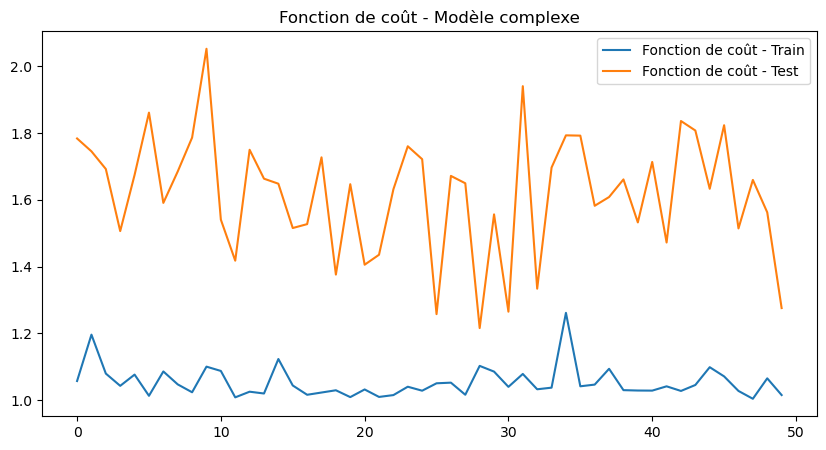

In [69]:
plt.figure(figsize=(10, 5))

plt.plot(history.history['loss'], label='Fonction de coût - Train')
plt.plot(history.history['val_loss'], label='Fonction de coût - Test')
plt.legend()
plt.title('Fonction de coût - Modèle complexe')

plt.show()